# Importing Libraries

In [ ]:
import pandas as pd
import ast
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading Dataset

In [ ]:
dataset = open ("/content/drive/MyDrive/Data sets/Census Income data.csv")

In [ ]:
df = pd.read_csv ("/content/drive/MyDrive/Data sets/Census Income data.csv")

# **Data Preparation**

In [ ]:
df.head()

73                  Not in universe   0  0.1  ...  2  0.8  95  -50000
0  58   Self-employed-not incorporated   4   34  ...  2   52  94  -50000
1  18                  Not in universe   0    0  ...  2    0  95  -50000
2   9                  Not in universe   0    0  ...  0    0  94  -50000
3  10                  Not in universe   0    0  ...  0    0  94  -50000
4  48                          Private  40   10  ...  2   52  95  -50000

[5 rows x 42 columns]

**Adding columns to the data**

In [ ]:
#to add columns names in data
headers = ["age", "classworker", "industrycode", "occupationcode", "education", "wagehour", "enrollineduclstweek", "maritalstat", "majorindcode", "majorocccode", "race", "origin", "sex", "memberoflabourunion", "reasonofunemploy", "fullorparttimeemploy", "capitalgains", "capitallosses", "dividendfromstock", "taxfiler", "regionofprevresidence", "stateofprevresidence", "householdandfamilystat", "householdsummary", "weight", "migrationinmsa", "migrationinreg", "migrationwithinreg", "liveoneyearago", "migrationinsunbelt", "personworkedforemployer", "fmunder18", "cbfather", "cbmother", "cbself", "citizenship", "ownbussorselfemp", "veteranadmin", "veteranbenefit", "weeksworked", "year", "income"]

In [ ]:
df.columns = headers

In [ ]:
df.head()

age                      classworker  ...  year  income
0   58   Self-employed-not incorporated  ...    94  -50000
1   18                  Not in universe  ...    95  -50000
2    9                  Not in universe  ...    94  -50000
3   10                  Not in universe  ...    94  -50000
4   48                          Private  ...    95  -50000

[5 rows x 42 columns]

In [ ]:
#To have information about data types and null valyes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 42 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      199522 non-null  int64  
 1   classworker              199522 non-null  object 
 2   industrycode             199522 non-null  int64  
 3   occupationcode           199522 non-null  int64  
 4   education                199522 non-null  object 
 5   wagehour                 199522 non-null  int64  
 6   enrollineduclstweek      199522 non-null  object 
 7   maritalstat              199522 non-null  object 
 8   majorindcode             199522 non-null  object 
 9   majorocccode             199522 non-null  object 
 10  race                     199522 non-null  object 
 11  origin                   199522 non-null  object 
 12  sex                      199522 non-null  object 
 13  memberoflabourunion      199522 non-null  object 
 14  reas

In [ ]:
#To have information of all the unique values in dataframe
[(i, df[i].unique()) for i in df]

[('age',
  array([58, 18,  9, 10, 48, 42, 28, 47, 34,  8, 32, 51, 46, 26, 13, 39, 16,
         35, 12, 27, 56, 55,  2,  1, 37,  4, 63, 25, 81, 11, 30,  7, 66, 84,
         52,  5, 36, 72, 61, 41, 90, 49,  6,  0, 33, 57, 50, 24, 17, 53, 40,
         54, 22, 29, 85, 38, 76, 21, 31, 74, 19, 15,  3, 43, 68, 71, 45, 62,
         23, 69, 75, 44, 59, 60, 64, 73, 65, 70, 67, 78, 20, 14, 83, 86, 89,
         77, 79, 82, 80, 87, 88])),
 ('classworker',
  array([' Self-employed-not incorporated', ' Not in universe', ' Private',
         ' Local government', ' Federal government',
         ' Self-employed-incorporated', ' State government',
         ' Never worked', ' Without pay'], dtype=object)),
 ('industrycode',
  array([ 4,  0, 40, 34, 43, 37, 24, 39, 12, 35, 45,  3, 19, 29, 32, 48, 33,
         23, 44, 36, 31, 30, 41,  5, 11,  9, 42,  6, 18, 50,  2,  1, 26, 47,
         16, 14, 22, 17,  7,  8, 25, 46, 27, 15, 13, 49, 38, 21, 28, 20, 51,
         10])),
 ('occupationcode',
  array([34,  0, 10

# **Missing Values**


* **Dealing with ? values in data**  





In [ ]:
df.isnull().sum()

age                        0
classworker                0
industrycode               0
occupationcode             0
education                  0
wagehour                   0
enrollineduclstweek        0
maritalstat                0
majorindcode               0
majorocccode               0
race                       0
origin                     0
sex                        0
memberoflabourunion        0
reasonofunemploy           0
fullorparttimeemploy       0
capitalgains               0
capitallosses              0
dividendfromstock          0
taxfiler                   0
regionofprevresidence      0
stateofprevresidence       0
householdandfamilystat     0
householdsummary           0
weight                     0
migrationinmsa             0
migrationinreg             0
migrationwithinreg         0
liveoneyearago             0
migrationinsunbelt         0
personworkedforemployer    0
fmunder18                  0
cbfather                   0
cbmother                   0
cbself        

There were some values with '?' in data, they were considered as the missing values. The ? values were not identified by the df.isnull code, so they were first converted into NaN.

In [ ]:
df['stateofprevresidence'] = df['stateofprevresidence'].mask(df['stateofprevresidence'].str.strip() == "?")

There were some whitespaces in the data when ? values were observed, so whitespaces were removed and then it was converted into NaN.

.str.strip code was used to remove whitespaces in the dataset

In [ ]:
df['migrationinmsa'].value_counts()

 ?                   99695
 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: migrationinmsa, dtype: int64

In [ ]:
df['migrationinmsa'] = df['migrationinmsa'].mask(df['migrationinmsa'].str.strip() == "?")

In [ ]:
df['migrationinmsa'].value_counts()

 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: migrationinmsa, dtype: int64

In [ ]:
df['migrationinreg'] = df['migrationinreg'].mask(df['migrationinreg'].str.strip() == "?")
df['migrationwithinreg'] = df['migrationwithinreg'].mask(df['migrationwithinreg'].str.strip() == "?")
df['migrationinsunbelt'] = df['migrationinsunbelt'].mask(df['migrationinsunbelt'].str.strip() == "?")
df['cbfather'] = df['cbfather'].mask(df['cbfather'].str.strip() == "?")
df['cbmother'] = df['cbmother'].mask(df['cbmother'].str.strip() == "?")
df['cbself'] = df['cbself'].mask(df['cbself'].str.strip() == "?")

In [ ]:
df.isnull().sum()

age                            0
classworker                    0
industrycode                   0
occupationcode                 0
education                      0
wagehour                       0
enrollineduclstweek            0
maritalstat                    0
majorindcode                   0
majorocccode                   0
race                           0
origin                         0
sex                            0
memberoflabourunion            0
reasonofunemploy               0
fullorparttimeemploy           0
capitalgains                   0
capitallosses                  0
dividendfromstock              0
taxfiler                       0
regionofprevresidence          0
stateofprevresidence         708
householdandfamilystat         0
householdsummary               0
weight                         0
migrationinmsa             99695
migrationinreg             99695
migrationwithinreg         99695
liveoneyearago                 0
migrationinsunbelt         99695
personwork

After converting ? values into NaN, the total number of missing values were identified for all the variables.

In [ ]:
df.head()

age                      classworker  ...  year  income
0   58   Self-employed-not incorporated  ...    94  -50000
1   18                  Not in universe  ...    95  -50000
2    9                  Not in universe  ...    94  -50000
3   10                  Not in universe  ...    94  -50000
4   48                          Private  ...    95  -50000

[5 rows x 42 columns]


*  **Dealing with Not in Universe Values**




There were some "Not in Universe" values in data. They were also consider as null values because not in universe implies that the particular person was not the part of the target population.

In [ ]:
df['classworker'] = df['classworker'].mask(df['classworker'].str.strip() == "Not in universe")

In [ ]:
df['enrollineduclstweek'] = df['enrollineduclstweek'].mask(df['enrollineduclstweek'].str.strip() == "Not in universe")
df['majorindcode'] = df['majorindcode'].mask(df['majorindcode'].str.strip() == "Not in universe or children")
df['majorocccode'] = df['majorocccode'].mask(df['majorocccode'].str.strip() == "Not in universe")
df['memberoflabourunion'] = df['memberoflabourunion'].mask(df['memberoflabourunion'].str.strip() == "Not in universe")
df['reasonofunemploy'] = df['reasonofunemploy'].mask(df['reasonofunemploy'].str.strip() == "Not in universe")
df['regionofprevresidence'] = df['regionofprevresidence'].mask(df['regionofprevresidence'].str.strip() == "Not in universe")
df['stateofprevresidence'] = df['stateofprevresidence'].mask(df['stateofprevresidence'].str.strip() == "Not in universe")
df['migrationinmsa'] = df['migrationinmsa'].mask(df['migrationinmsa'].str.strip() == "Not in universe")
df['migrationinreg'] = df['migrationinreg'].mask(df['migrationinreg'].str.strip() == "Not in universe")
df['migrationwithinreg'] = df['migrationwithinreg'].mask(df['migrationwithinreg'].str.strip() == "Not in universe")
df['migrationinsunbelt'] = df['migrationinsunbelt'].mask(df['migrationinsunbelt'].str.strip() == "Not in universe")
df['liveoneyearago'] = df['liveoneyearago'].mask(df['liveoneyearago'].str.strip() == "Not in universe under 1 year old")
df['fmunder18'] = df['fmunder18'].mask(df['fmunder18'].str.strip() == "Not in universe")
df['veteranadmin'] = df['veteranadmin'].mask(df['veteranadmin'].str.strip() == "Not in universe")

In [ ]:
df.isnull().sum()

age                             0
classworker                100244
industrycode                    0
occupationcode                  0
education                       0
wagehour                        0
enrollineduclstweek        186942
maritalstat                     0
majorindcode               100683
majorocccode               100683
race                            0
origin                          0
sex                             0
memberoflabourunion        180458
reasonofunemploy           193452
fullorparttimeemploy            0
capitalgains                    0
capitallosses                   0
dividendfromstock               0
taxfiler                        0
regionofprevresidence      183749
stateofprevresidence       184457
householdandfamilystat          0
householdsummary                0
weight                          0
migrationinmsa             101211
migrationinreg             101211
migrationwithinreg         101211
liveoneyearago             101211
migrationinsun

In [ ]:
df.head()

age                      classworker  ...  year  income
0   58   Self-employed-not incorporated  ...    94  -50000
1   18                              NaN  ...    95  -50000
2    9                              NaN  ...    94  -50000
3   10                              NaN  ...    94  -50000
4   48                          Private  ...    95  -50000

[5 rows x 42 columns]

All the null values in the data were replaced by mode

In [ ]:
for col in ['classworker', 'enrollineduclstweek', 'majorindcode', 'majorocccode', 'memberoflabourunion', 'reasonofunemploy', 'regionofprevresidence', 'stateofprevresidence', 'migrationinmsa', 'migrationinreg', 'migrationwithinreg', 'migrationinsunbelt', 'liveoneyearago', 'fmunder18', 'cbfather', 'cbmother', 'cbself', 'veteranadmin']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.head()

age                      classworker  ...  year  income
0   58   Self-employed-not incorporated  ...    94  -50000
1   18                          Private  ...    95  -50000
2    9                          Private  ...    94  -50000
3   10                          Private  ...    94  -50000
4   48                          Private  ...    95  -50000

[5 rows x 42 columns]

# **Label Encoding**

Label Encoding technique was used to deal with categorical variables and assign numerical values.

In [ ]:
#the variables having dtype as object were converted into numerical values
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        le = LabelEncoder()

        df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
df.head()

age  classworker  industrycode  ...  weeksworked  year  income
0   58            5             4  ...           52    94       1
1   18            3             0  ...            0    95       1
2    9            3             0  ...            0    94       1
3   10            3             0  ...            0    94       1
4   48            3            40  ...           52    95       1

[5 rows x 42 columns]

In [ ]:
from sklearn import preprocessing

In [ ]:
#to identify numeric class assigned to each variable
le = preprocessing.LabelEncoder()
le.fit(df['education'])
print(le.classes_)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [ ]:
df['income'].value_counts()

1    187140
0     12382
Name: income, dtype: int64

Less than 50,000 income is assigned 1 value

**93.6% of people have less than 50,000 income**

# **EDA**


*  **Dealing with duplicates**



In [ ]:
print("shape of the dataset before removing duplicates", df.shape)
df.drop_duplicates(keep='first',inplace=True)
print("shape of the dataset after removing duplicates", df.shape)

shape of the dataset before removing duplicates (199522, 42)
shape of the dataset after removing duplicates (196193, 42)


Duplicate values were removed from he dataset


*   **Distribution Plots of all variables**



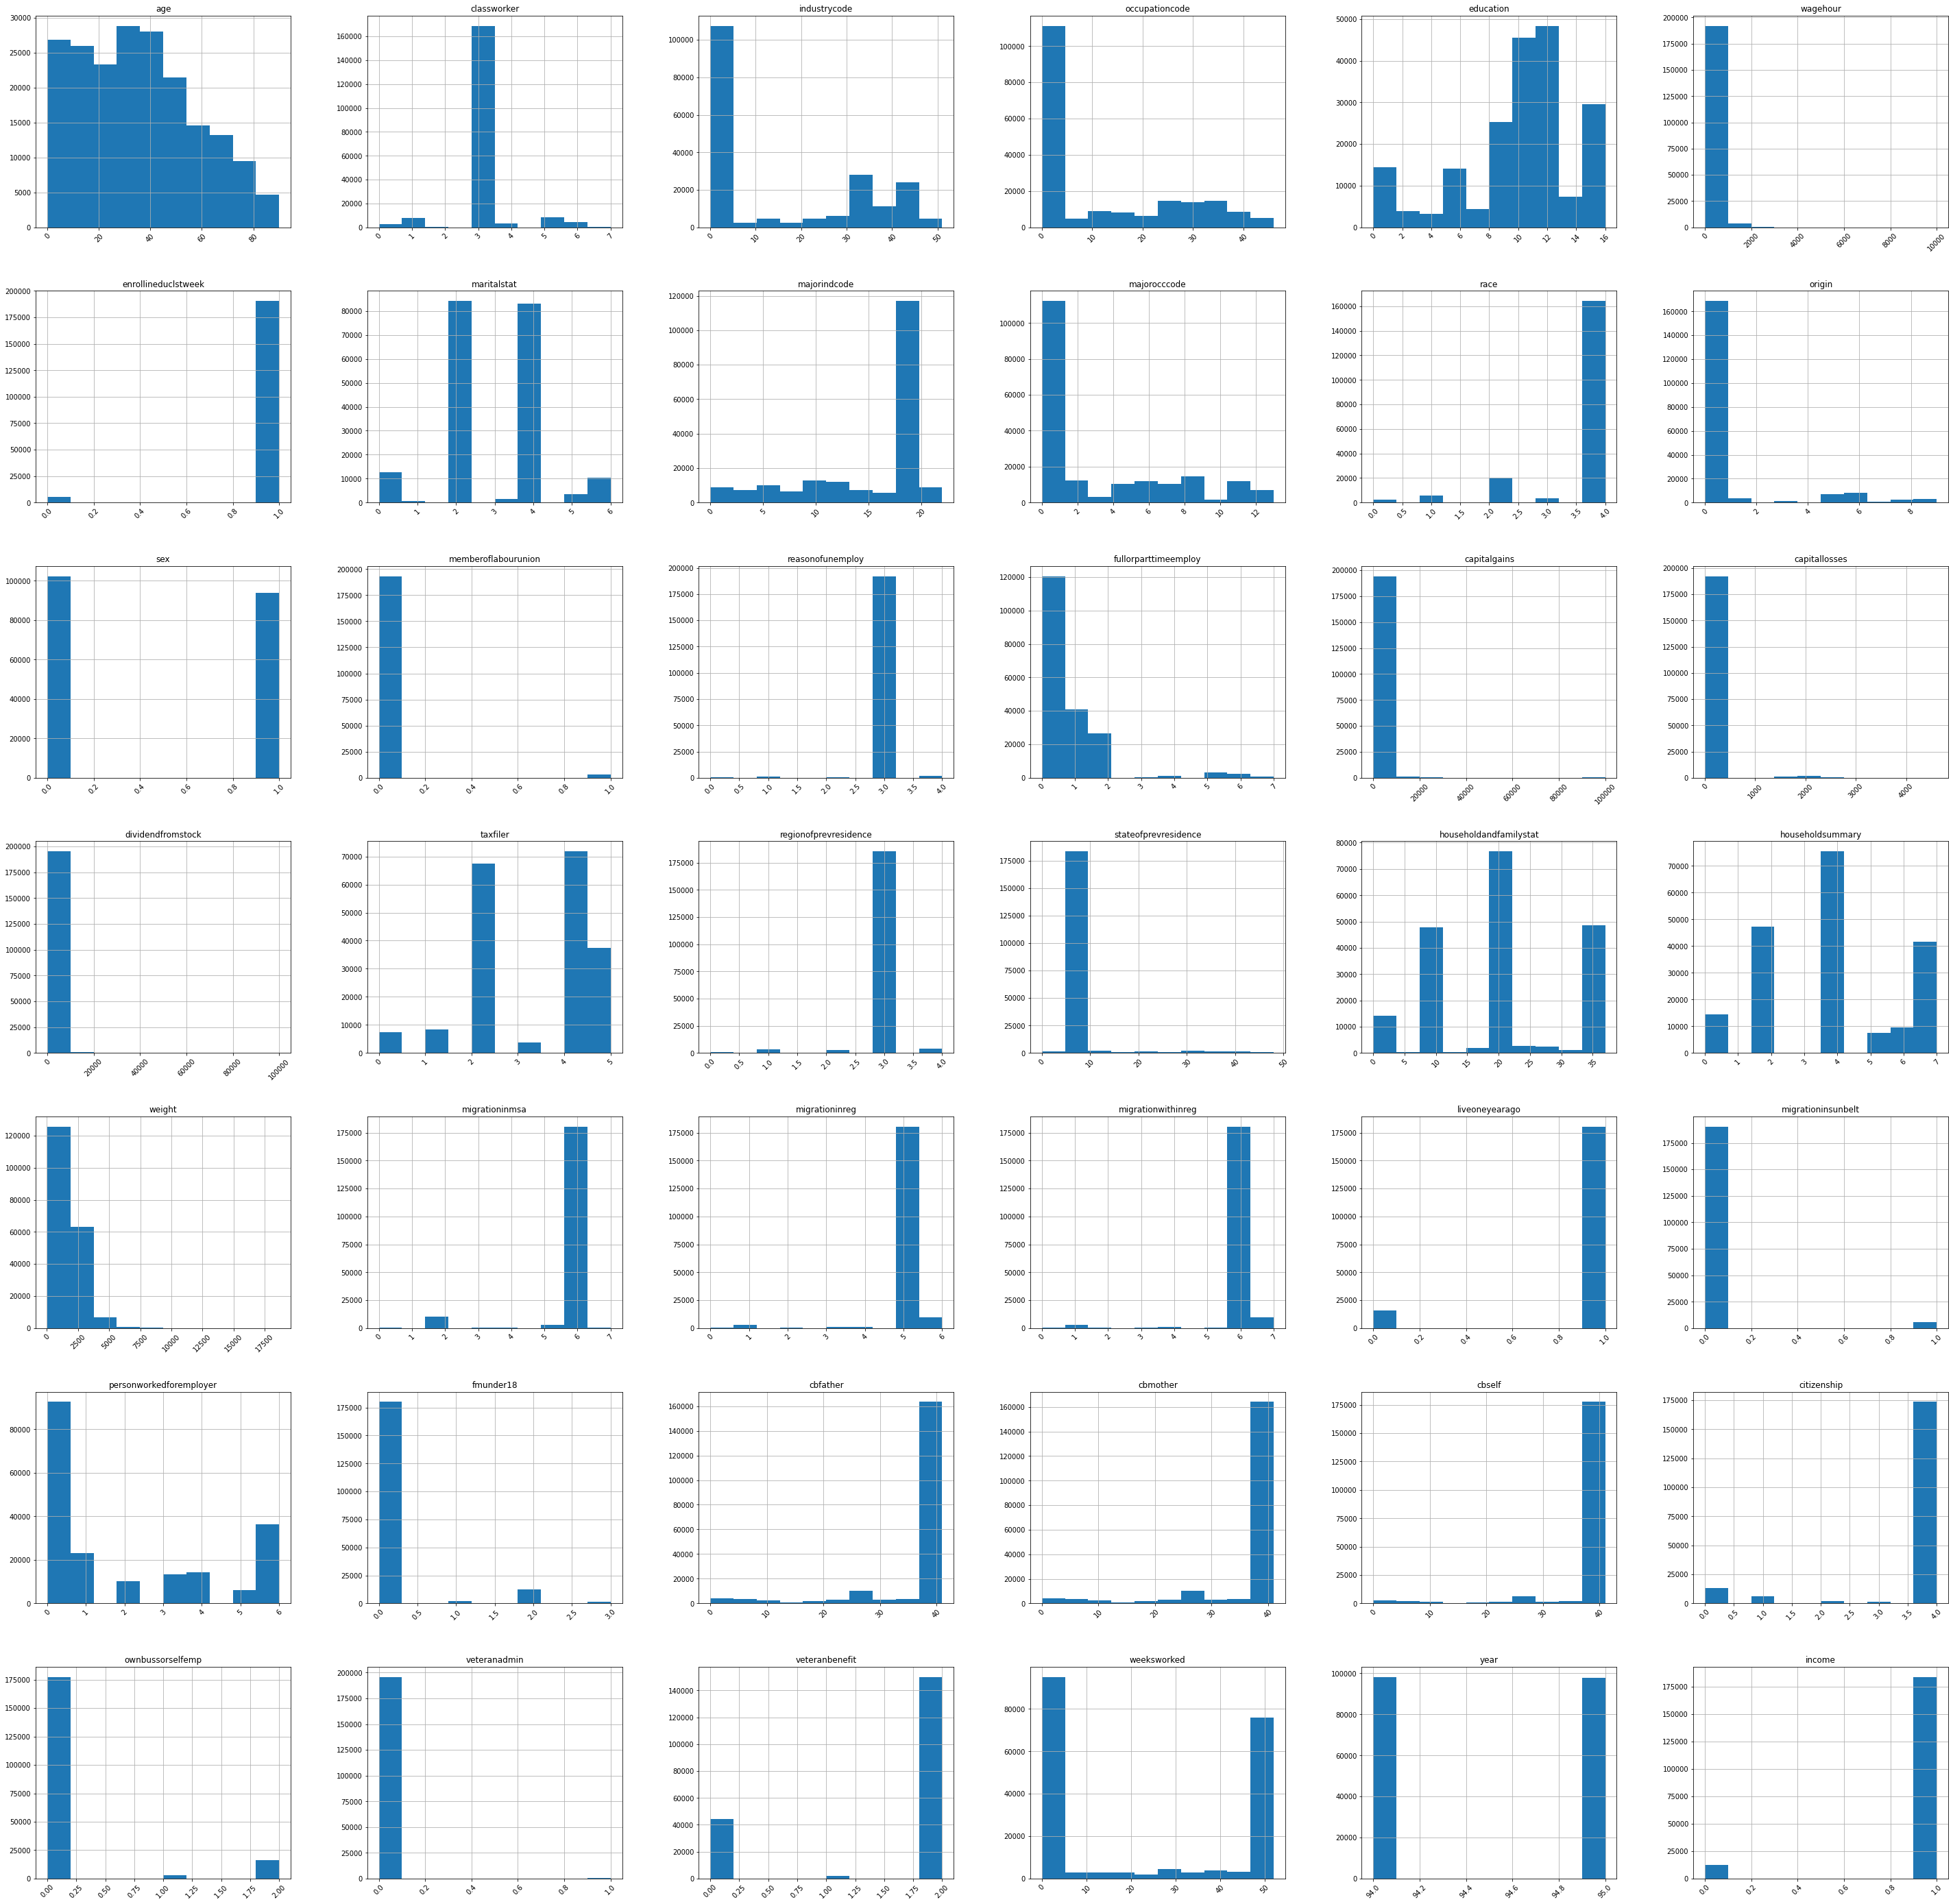

In [ ]:
df.hist(figsize=(50,50), xrot=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


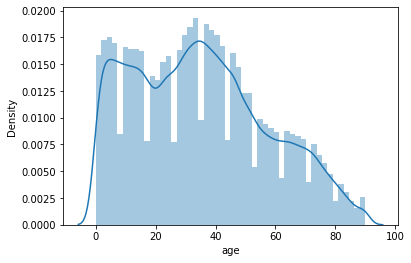

In [ ]:
sns.distplot(df['age'])

In [ ]:
#To get statistical summary of the data
df.describe()

age    classworker  ...           year         income
count  196193.000000  196193.000000  ...  196193.000000  196193.000000
mean       34.942444       3.044395  ...      94.499274       0.936889
std        22.205446       0.830205  ...       0.500001       0.243164
min         0.000000       0.000000  ...      94.000000       0.000000
25%        16.000000       3.000000  ...      94.000000       1.000000
50%        34.000000       3.000000  ...      94.000000       1.000000
75%        50.000000       3.000000  ...      95.000000       1.000000
max        90.000000       7.000000  ...      95.000000       1.000000

[8 rows x 42 columns]

# **Outliers Detection**


*   **IQR Method was used for outliers detection**


In [ ]:
Q1 = (df.quantile(0.25))
Q3 = (df.quantile(0.75))
IQR = Q3 - Q1
print(IQR)

age                          34.00
classworker                   0.00
industrycode                 33.00
occupationcode               26.00
education                     3.00
wagehour                      0.00
enrollineduclstweek           0.00
maritalstat                   2.00
majorindcode                  7.00
majorocccode                  6.00
race                          0.00
origin                        0.00
sex                           1.00
memberoflabourunion           0.00
reasonofunemploy              0.00
fullorparttimeemploy          1.00
capitalgains                  0.00
capitallosses                 0.00
dividendfromstock             0.00
taxfiler                      2.00
regionofprevresidence         0.00
stateofprevresidence          0.00
householdandfamilystat       23.00
householdsummary              4.00
weight                     1132.92
migrationinmsa                0.00
migrationinreg                0.00
migrationwithinreg            0.00
liveoneyearago      

For outlier detection, IQR method was used because there are some extreme values present in the data

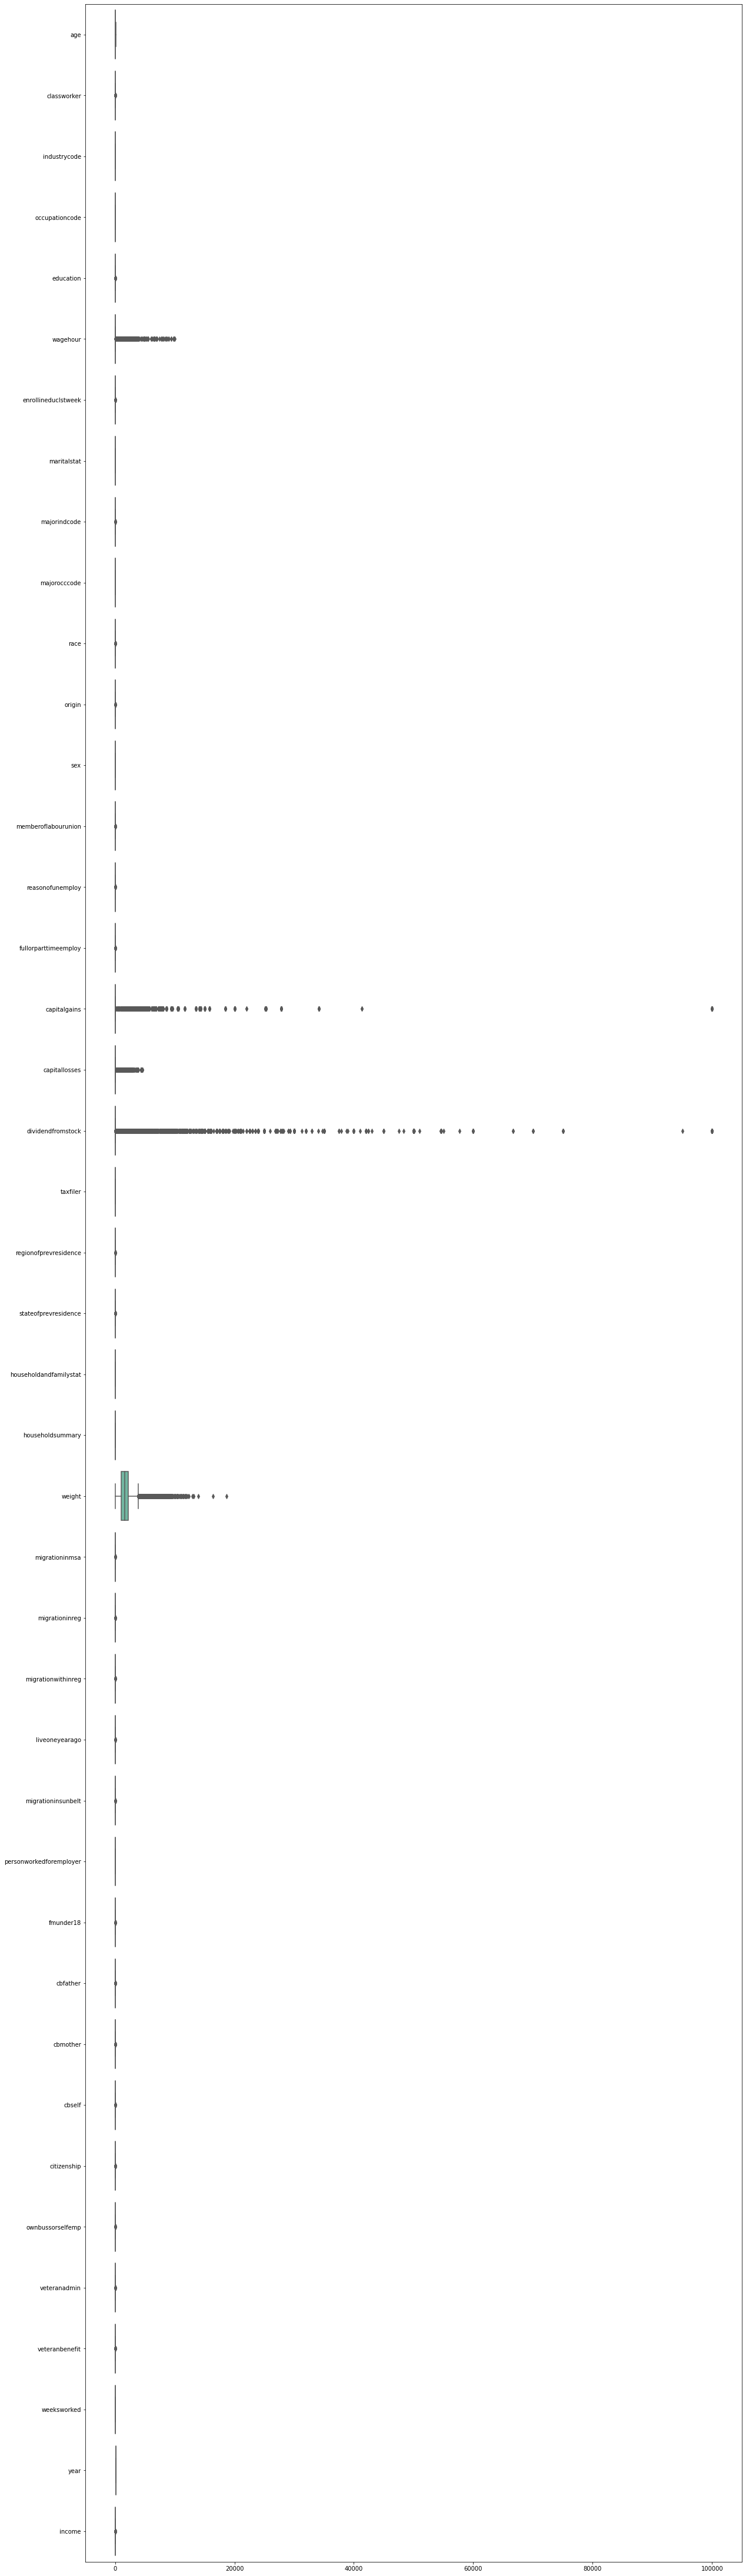

In [ ]:
#Box plot Visualization of all the variables
plt.figure(figsize=(20,80))
ax = sns.boxplot(data=df, orient="h", palette="Set2", fliersize="5")

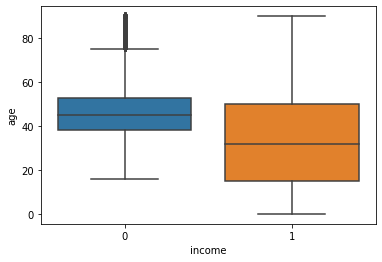

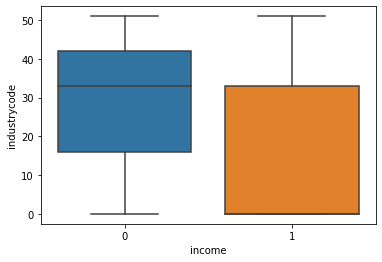

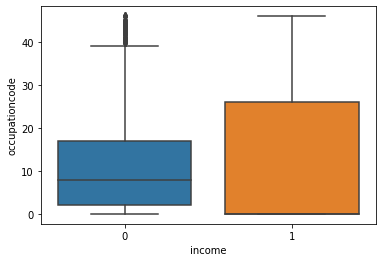

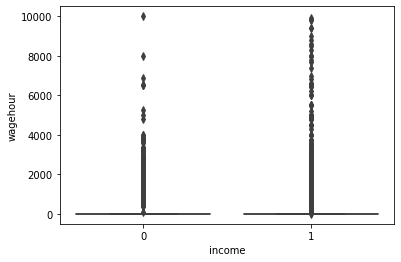

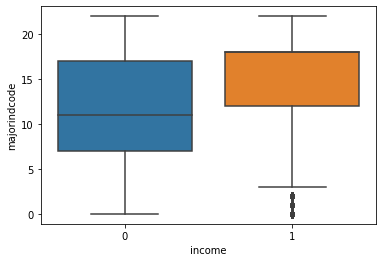

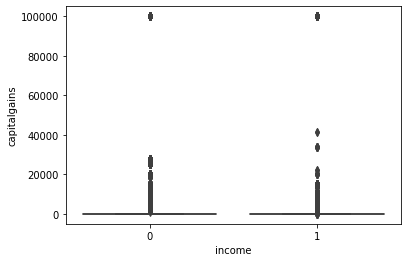

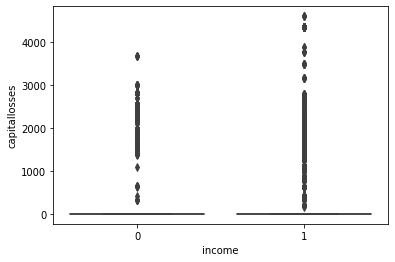

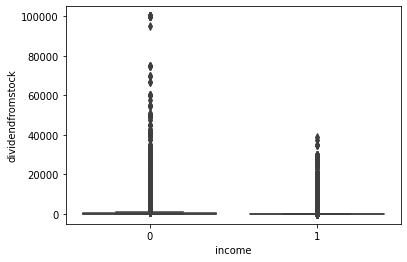

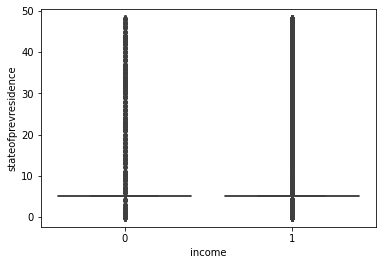

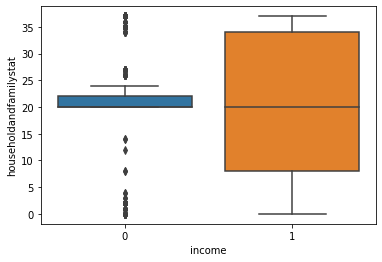

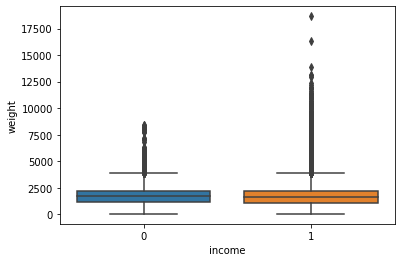

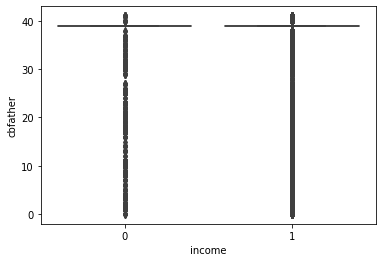

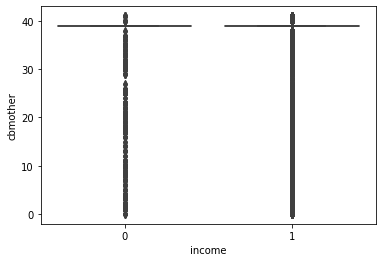

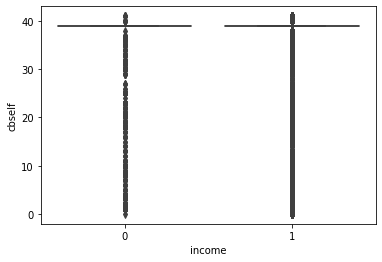

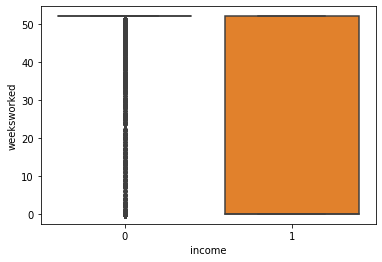

In [ ]:
#Box plot visualization of all the variables in the data frame with respect to the target variable i.e. income
for column in df:
 if df[column].nunique() > 20:
  sns.boxplot(y=column, x='income', data=df)
  plt.show()

**Box Plot Visualization**

In [ ]:
import ipywidgets as widgets

Allfileslist = list(df)
#Search box + generate ALL the checkboxes, this seems to be the bottleneck
search_widget = widgets.Text(placeholder='Type variable', description= 'Select variable:', layout={'width': 'auto'})
# experiments = {eachfilename: widgets.Checkbox(description=eachfilename, value=False) for eachfilename in Allfileslist}
experiments = {}

options_widget = widgets.VBox(layout={'width': 'auto'})
def whentextischanged (change):
    """Dynamically update the widget experiments"""
    search_input = change['new']
    if search_input == '':
        # Reset search field, default to last 9 experiments
        new_options = [experiments[eachfilename] for eachfilename in Allfileslist[-10:]]
    else:
        # Filter by search
        close_matches = [x for x in Allfileslist if search_input in x][:10]
        for name in close_matches:
            if name not in experiments:
              experiments[name] = widgets.Checkbox(description=name, value=False, layout={'width': 'auto'})
              ### magic code that generates only the match boxes ###
        new_options = [experiments[eachfilename] for eachfilename in close_matches]

    options_widget.children = new_options

#Generate the vbox, search
multi_select = widgets.VBox([search_widget, options_widget])
search_widget.observe(whentextischanged, names='value')

#serve it up
multi_select

In [ ]:
column_names = ([key for key, exp_check in experiments.items() if exp_check.value][0])
column_names

'age'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


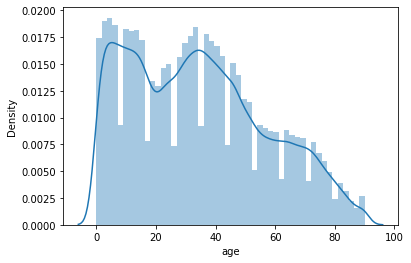

In [ ]:
sns.distplot(df[column_names])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


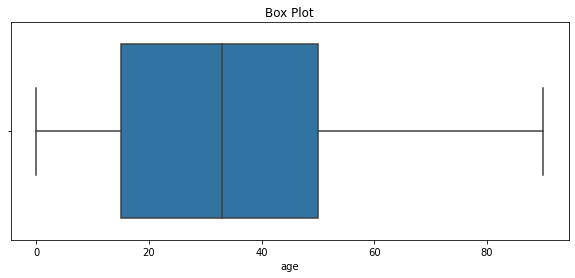

In [ ]:
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(df[column_names])

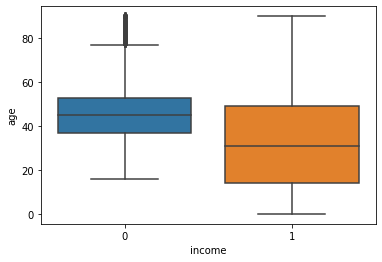

In [ ]:
sns.boxplot(y=column_names, x='income', data=df)

# **Transformation for Normal Distribution**

Box Cox Transformation is used because there are zero values in data. Log transformation does not work with zero values. So box cox transformation is used.

In [ ]:
import pandas as pd
from scipy.special import boxcox1p
df.apply(lambda x: boxcox1p(x,0.25))

age  classworker  industrycode  ...  weeksworked      year    income
0       7.085952     2.260338      1.981395  ...     6.792672  8.487943  0.756828
1       4.351191     1.656854      0.000000  ...     0.000000  8.520677  0.756828
2       3.113118     1.656854      0.000000  ...     0.000000  8.487943  0.756828
3       3.284641     1.656854      0.000000  ...     0.000000  8.487943  0.756828
4       6.583005     1.656854      6.121758  ...     6.792672  8.520677  0.756828
...          ...          ...           ...  ...          ...       ...       ...
199517  8.251257     1.656854      0.000000  ...     0.000000  8.520677  0.756828
199518  7.401080     1.981395      5.931295  ...     6.792672  8.487943  0.756828
199519  6.528592     1.656854      0.000000  ...     6.792672  8.520677  0.756828
199520  4.122173     1.656854      0.000000  ...     0.000000  8.520677  0.756828
199521  5.587127     1.656854      6.242998  ...     6.792672  8.487943  0.756828

[196193 rows x 42 columns]

Visualization distribution of all variables after transformation

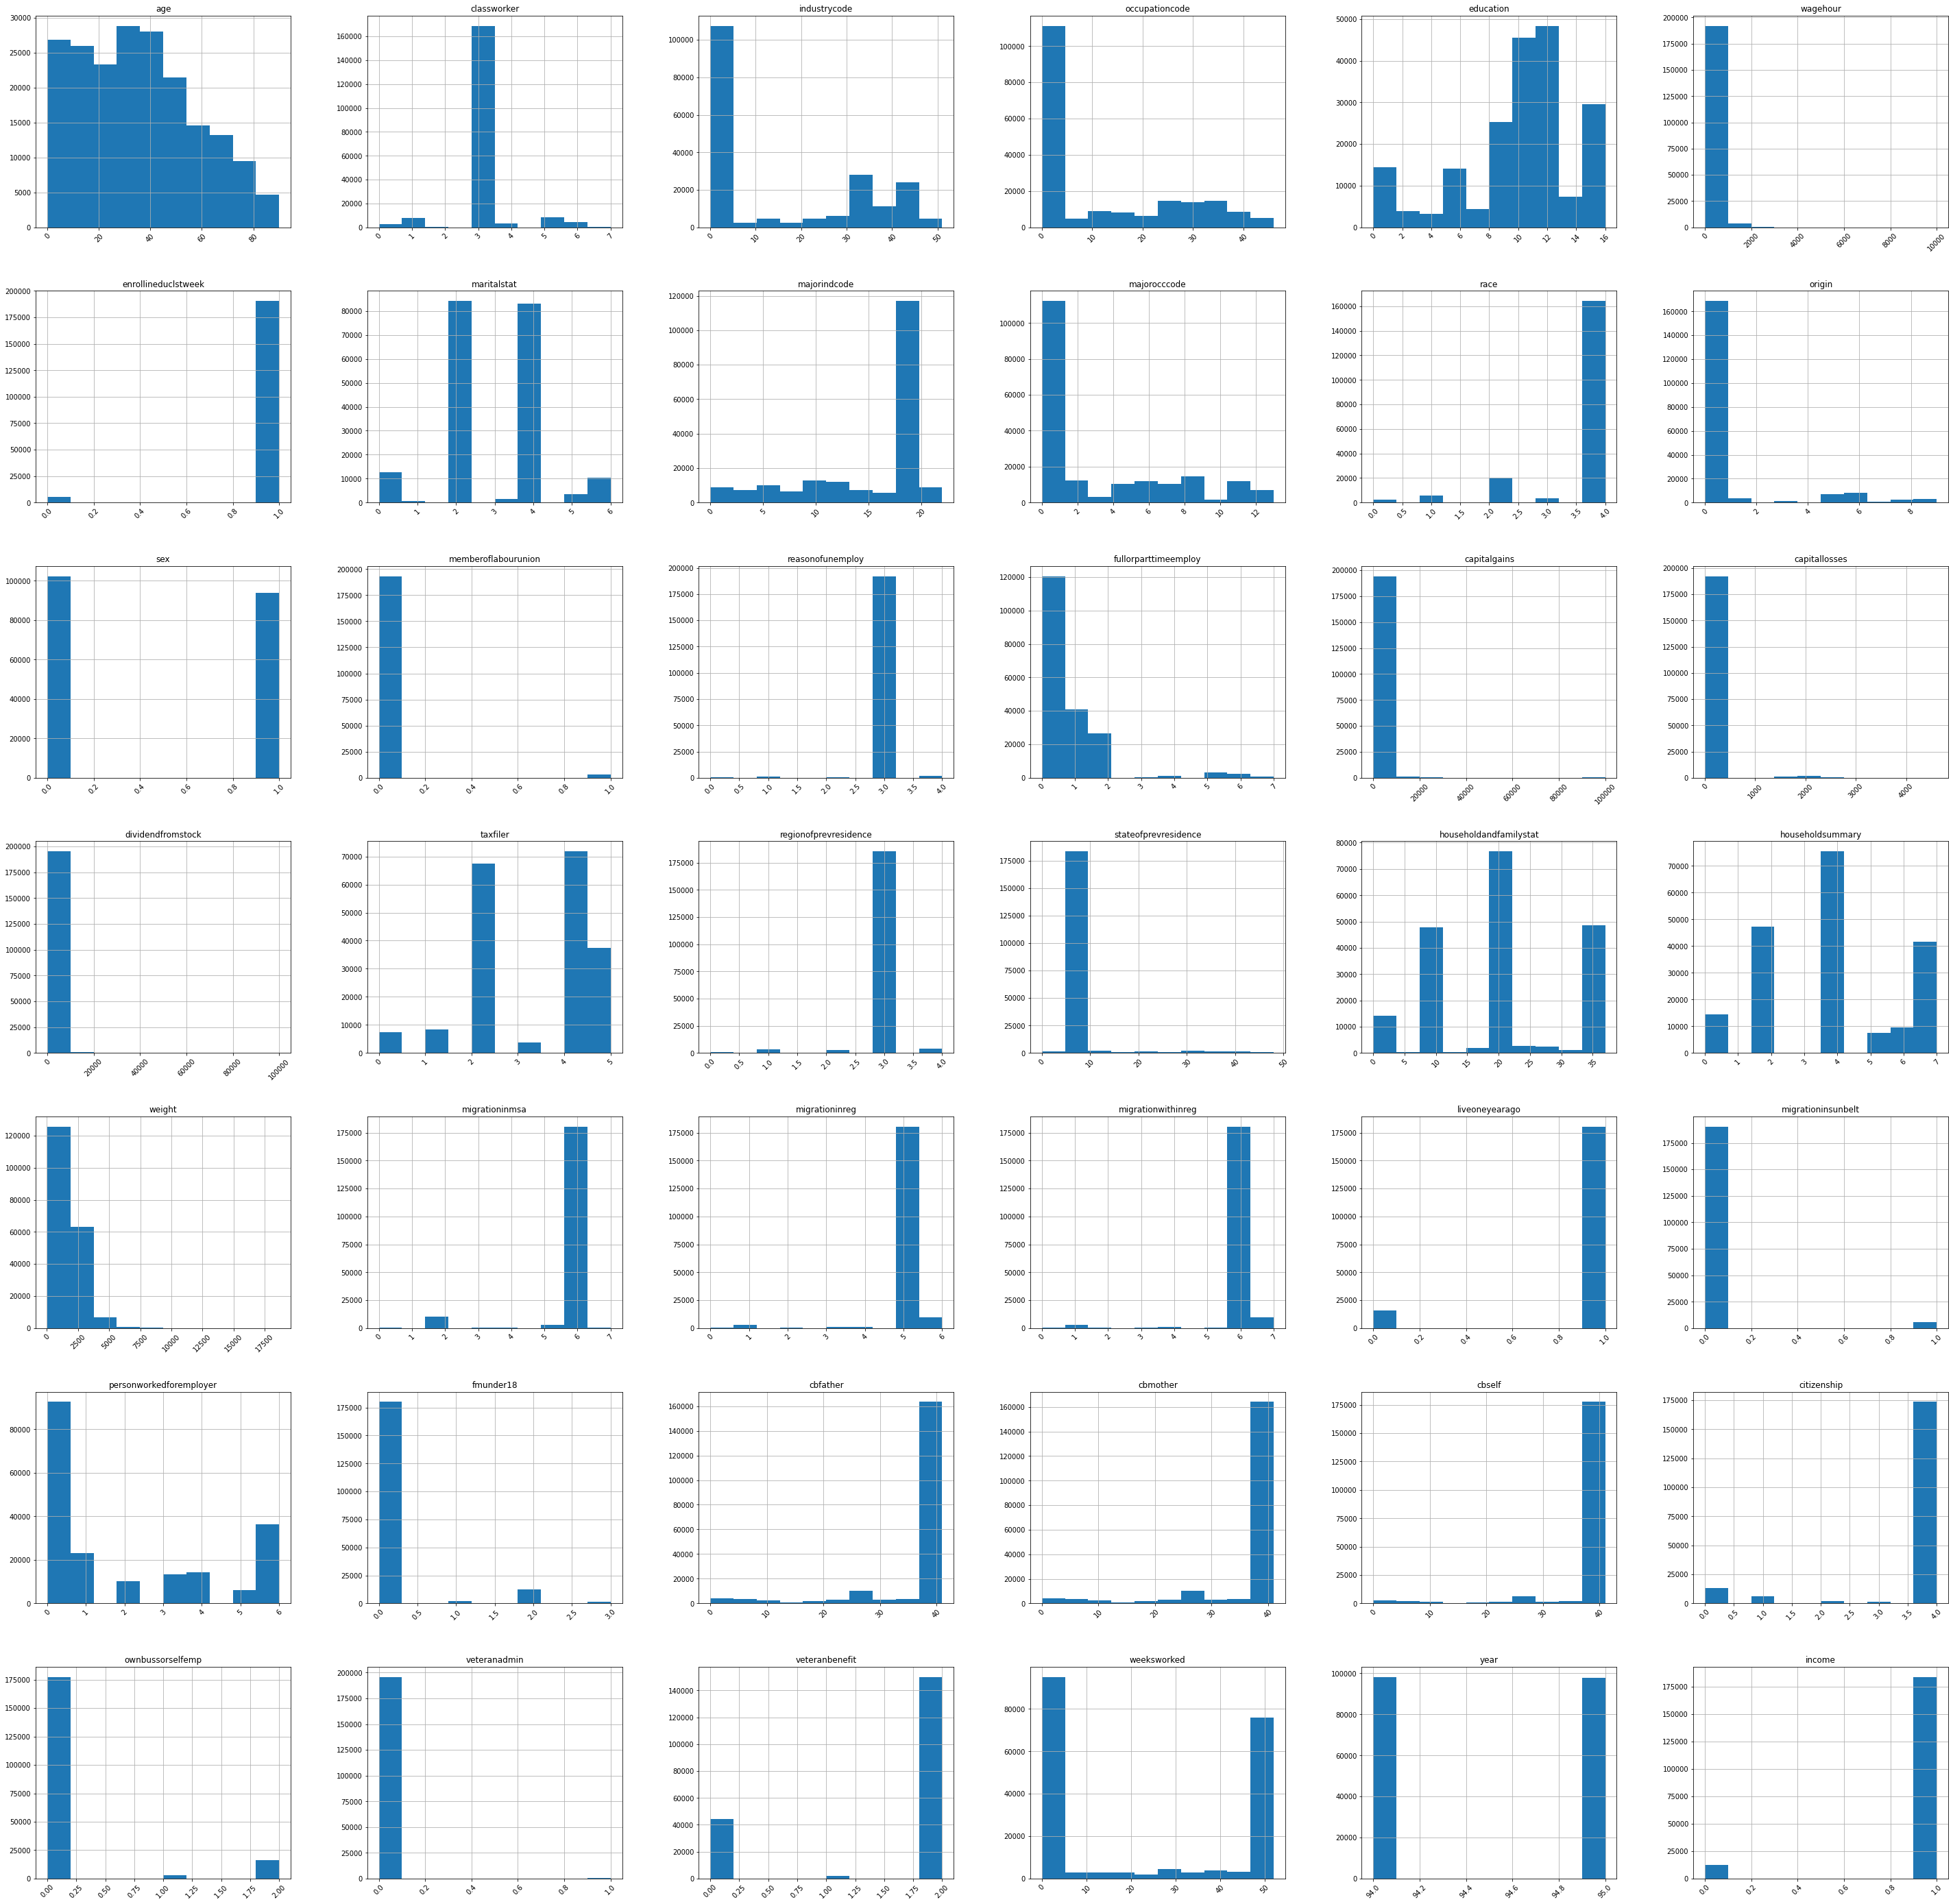

In [ ]:
df.hist(figsize=(50,50), xrot=45)
plt.show()

# **Removing outliers and distribution plots**

Visualization of distribution and box plots before and after removal of outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


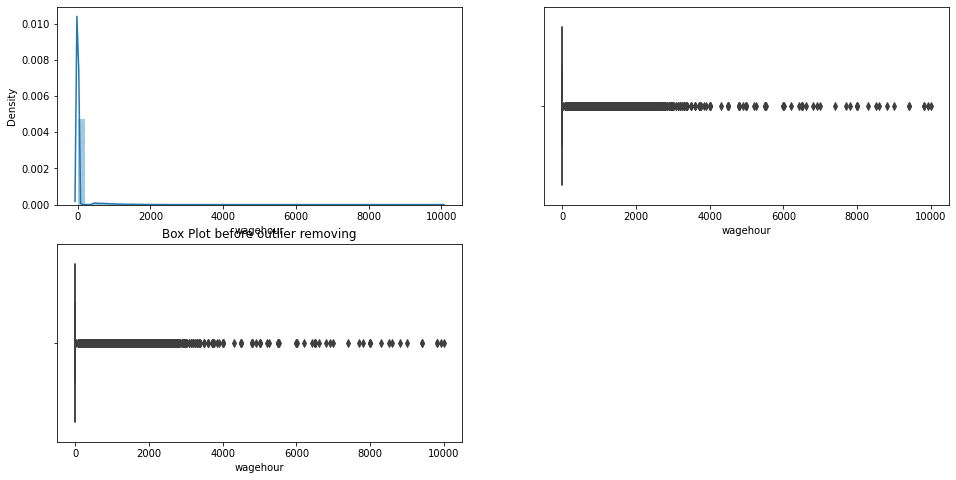

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


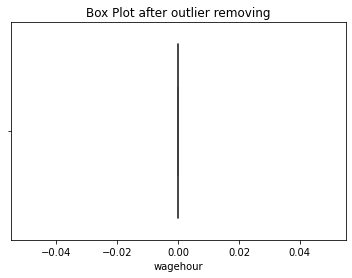

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


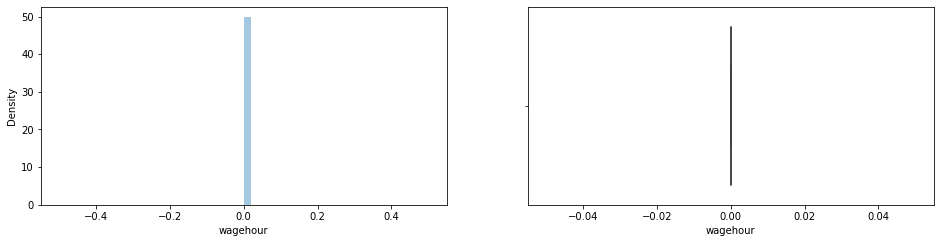

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['wagehour'])
plt.subplot(2,2,2)
sns.boxplot(df['wagehour'])
plt.subplot(2,2,3)
sns.boxplot(df['wagehour'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'wagehour')
sns.boxplot(df['wagehour'])
plt.title("Box Plot after outlier removing")
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['wagehour'])
plt.subplot(2,2,2)
sns.boxplot(df['wagehour'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


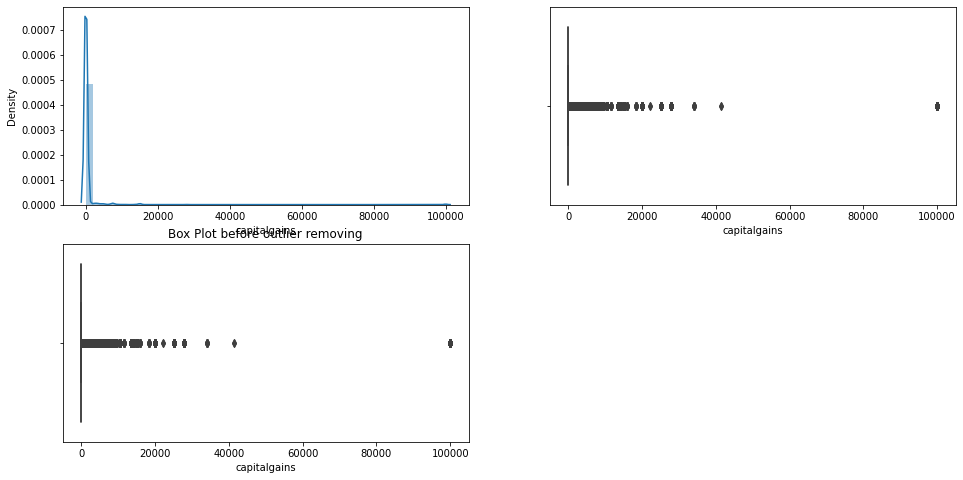

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


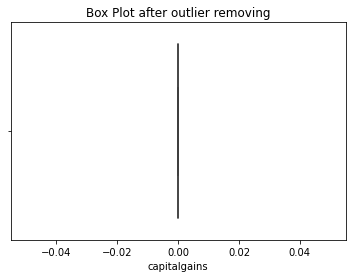

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


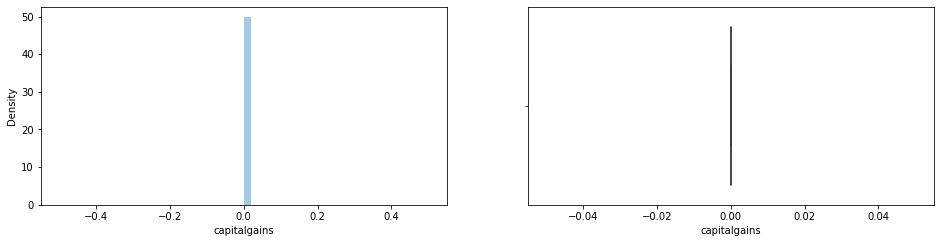

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['capitalgains'])
plt.subplot(2,2,2)
sns.boxplot(df['capitalgains'])
plt.subplot(2,2,3)
sns.boxplot(df['capitalgains'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'capitalgains')
sns.boxplot(df['capitalgains'])
plt.title("Box Plot after outlier removing")
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['capitalgains'])
plt.subplot(2,2,2)
sns.boxplot(df['capitalgains'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


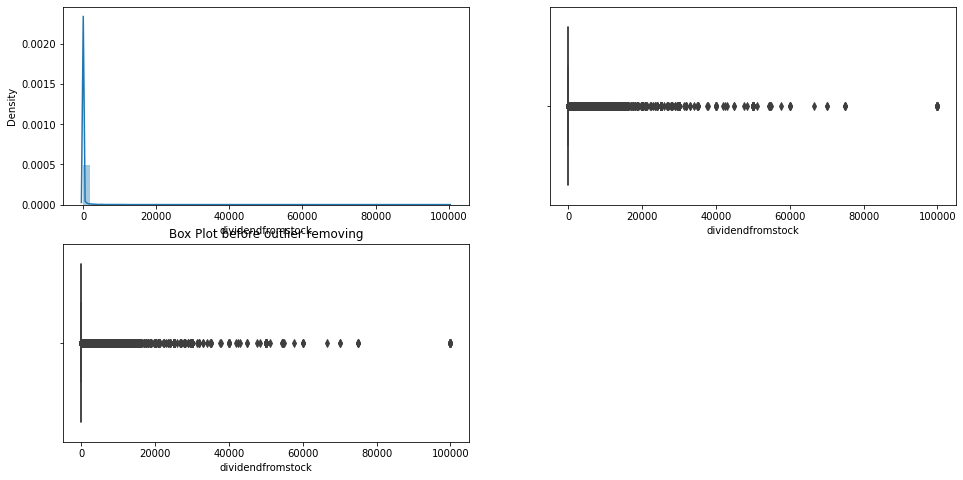

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


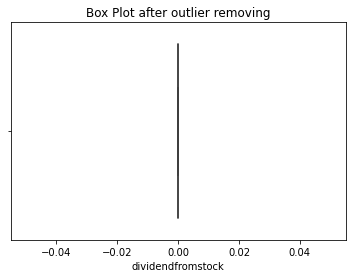

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


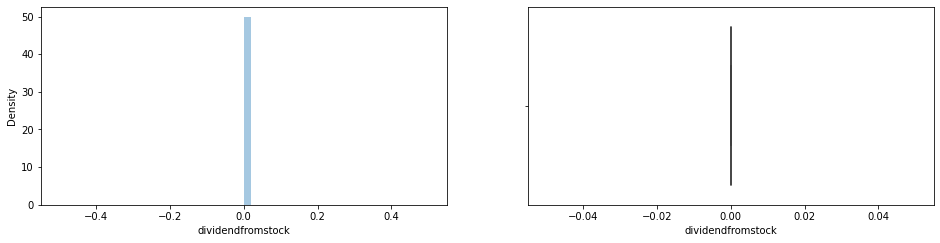

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['dividendfromstock'])
plt.subplot(2,2,2)
sns.boxplot(df['dividendfromstock'])
plt.subplot(2,2,3)
sns.boxplot(df['dividendfromstock'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'dividendfromstock')
sns.boxplot(df['dividendfromstock'])
plt.title("Box Plot after outlier removing")
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['dividendfromstock'])
plt.subplot(2,2,2)
sns.boxplot(df['dividendfromstock'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


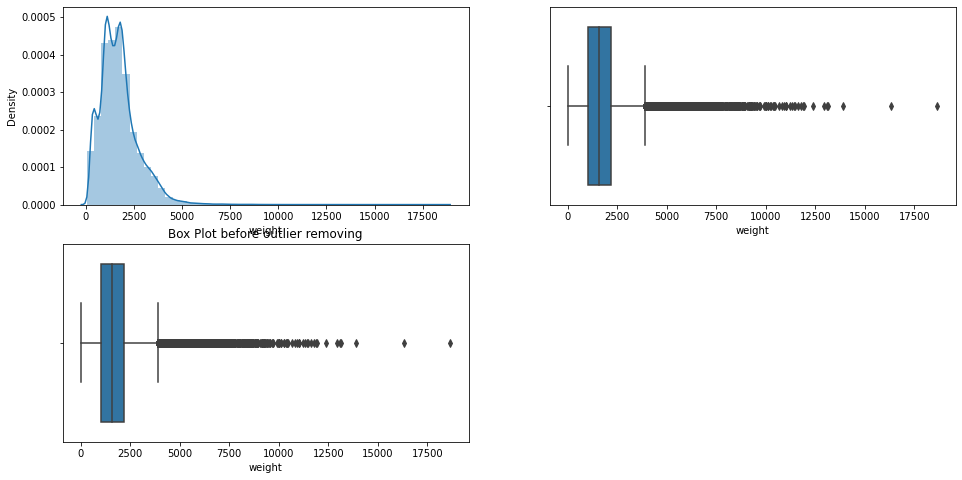

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


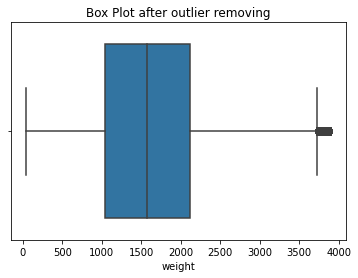

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


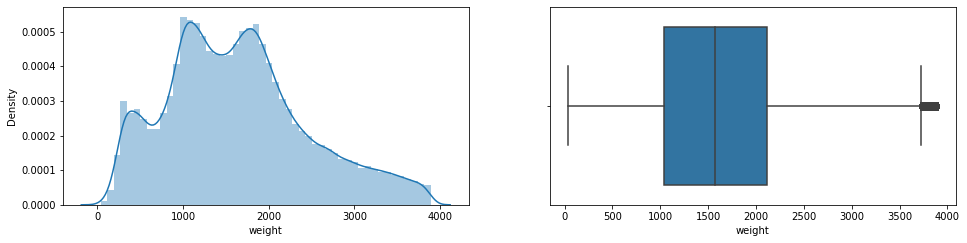

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['weight'])
plt.subplot(2,2,2)
sns.boxplot(df['weight'])
plt.subplot(2,2,3)
sns.boxplot(df['weight'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df, 'weight')
sns.boxplot(df['weight'])
plt.title("Box Plot after outlier removing")
plt.show()

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['weight'])
plt.subplot(2,2,2)
sns.boxplot(df['weight'])

In [ ]:
df.shape

(177973, 42)

**10% data is removed because of the presence of outliers.**

In [ ]:
df['income'].value_counts()

1    168483
0      9490
Name: income, dtype: int64

**94.6% of people have less than 50,000 income**

# **Feature Engineering**

In [ ]:
df.head()

age  classworker  industrycode  ...  weeksworked  year  income
0   58            5             4  ...           52    94       1
1   18            3             0  ...            0    95       1
2    9            3             0  ...            0    94       1
3   10            3             0  ...            0    94       1
6   28            3             4  ...           30    95       1

[5 rows x 42 columns]

In [ ]:
df.shape

(177973, 42)

In [ ]:
tempdf = pd.DataFrame(df)
for col in tempdf.columns:
    if "wagehour" in col:
        del tempdf[col]

tempdf

age  classworker  industrycode  ...  weeksworked  year  income
0        58            5             4  ...           52    94       1
1        18            3             0  ...            0    95       1
2         9            3             0  ...            0    94       1
3        10            3             0  ...            0    94       1
6        28            3             4  ...           30    95       1
...     ...          ...           ...  ...          ...   ...     ...
199515    3            3             0  ...            0    94       1
199517   87            3             0  ...            0    95       1
199519   47            3             0  ...           52    95       1
199520   16            3             0  ...            0    95       1
199521   32            3            42  ...           52    94       1

[177973 rows x 41 columns]

In [ ]:
tempdf = pd.DataFrame(df)
for col in tempdf.columns:
    if "capitalgains" in col:
        del tempdf[col]

tempdf

age  classworker  industrycode  ...  weeksworked  year  income
0        58            5             4  ...           52    94       1
1        18            3             0  ...            0    95       1
2         9            3             0  ...            0    94       1
3        10            3             0  ...            0    94       1
6        28            3             4  ...           30    95       1
...     ...          ...           ...  ...          ...   ...     ...
199515    3            3             0  ...            0    94       1
199517   87            3             0  ...            0    95       1
199519   47            3             0  ...           52    95       1
199520   16            3             0  ...            0    95       1
199521   32            3            42  ...           52    94       1

[177973 rows x 40 columns]

In [ ]:
tempdf = pd.DataFrame(df)
for col in tempdf.columns:
    if "dividendfromstock" in col:
        del tempdf[col]

tempdf

age  classworker  industrycode  ...  weeksworked  year  income
0        58            5             4  ...           52    94       1
1        18            3             0  ...            0    95       1
2         9            3             0  ...            0    94       1
3        10            3             0  ...            0    94       1
6        28            3             4  ...           30    95       1
...     ...          ...           ...  ...          ...   ...     ...
199515    3            3             0  ...            0    94       1
199517   87            3             0  ...            0    95       1
199519   47            3             0  ...           52    95       1
199520   16            3             0  ...            0    95       1
199521   32            3            42  ...           52    94       1

[177973 rows x 39 columns]

Wagehour, capitalgains and dividendfromstock columns were dropped from dataframe because they were perfectly correlated


*  **Multivariate Analysis**



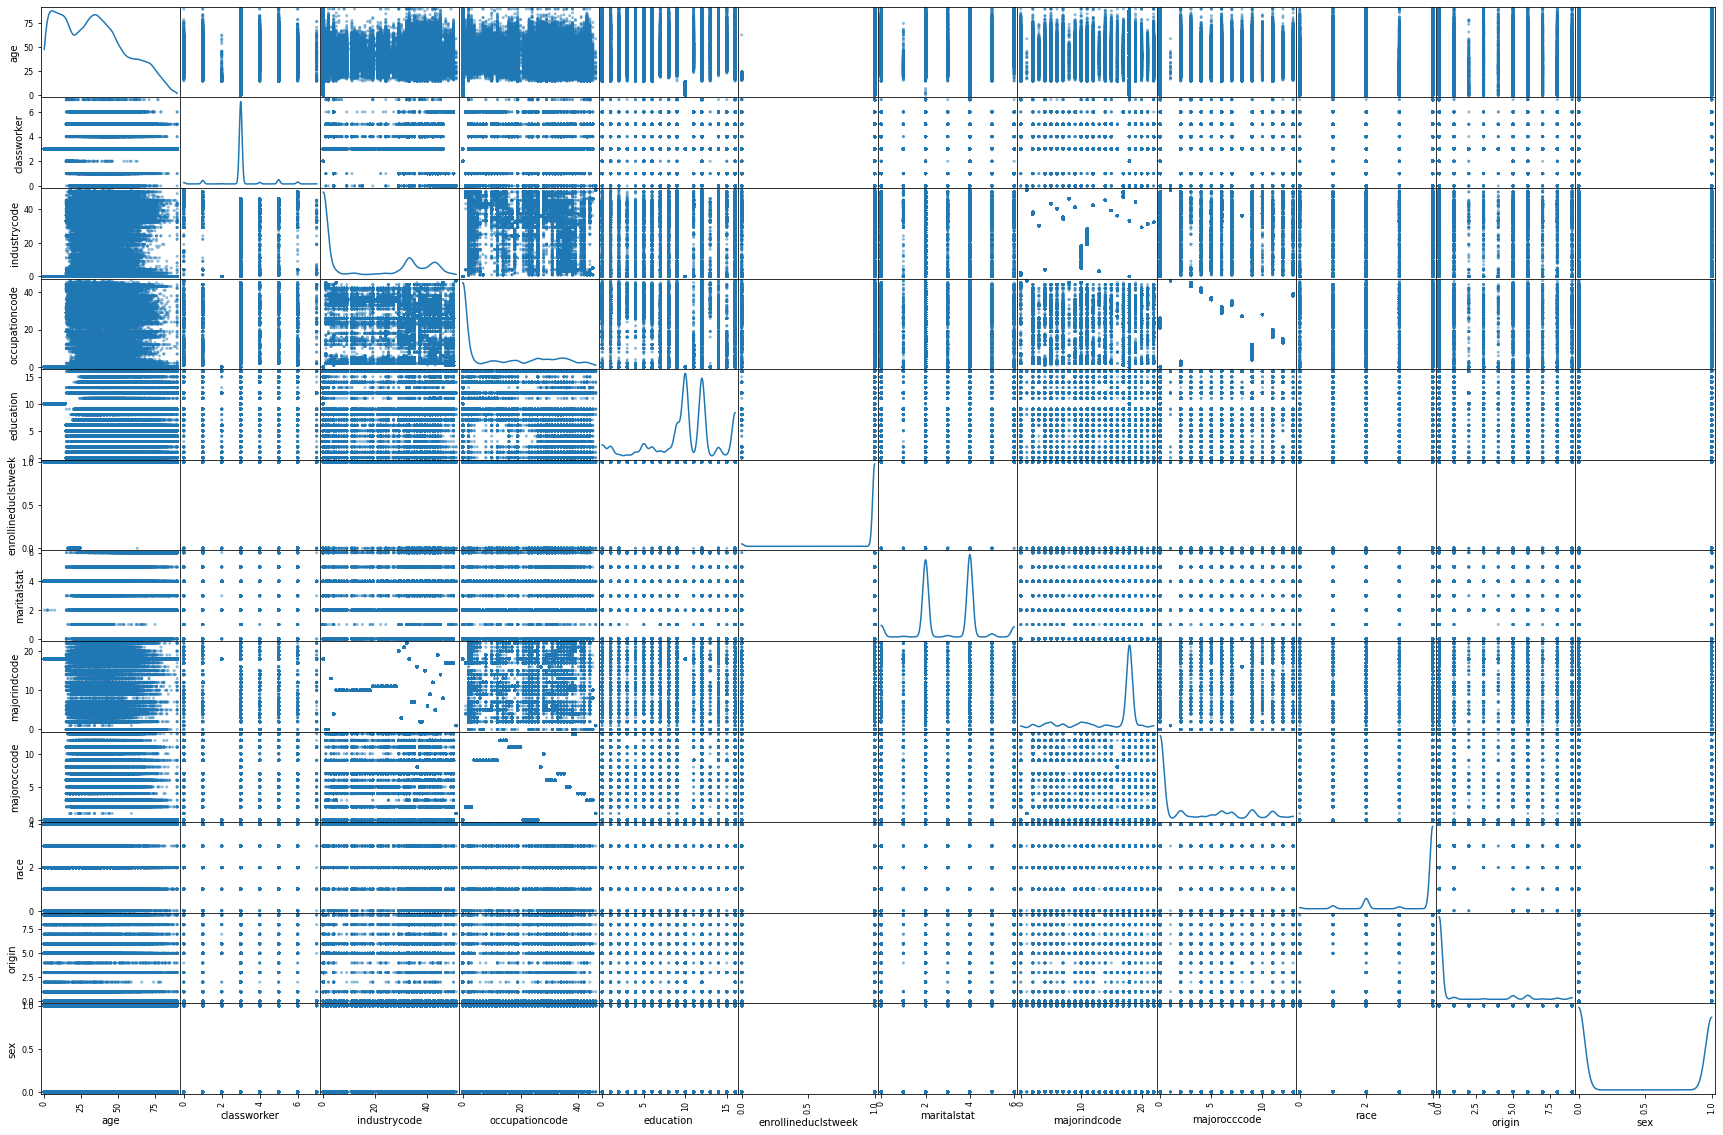

In [ ]:
pd.plotting.scatter_matrix(df.loc[:, "age":"sex"], diagonal="kde",figsize=(30,20))
plt.show()



1.   industrycode, occupationcode and majorindcode are positively correlated with age.



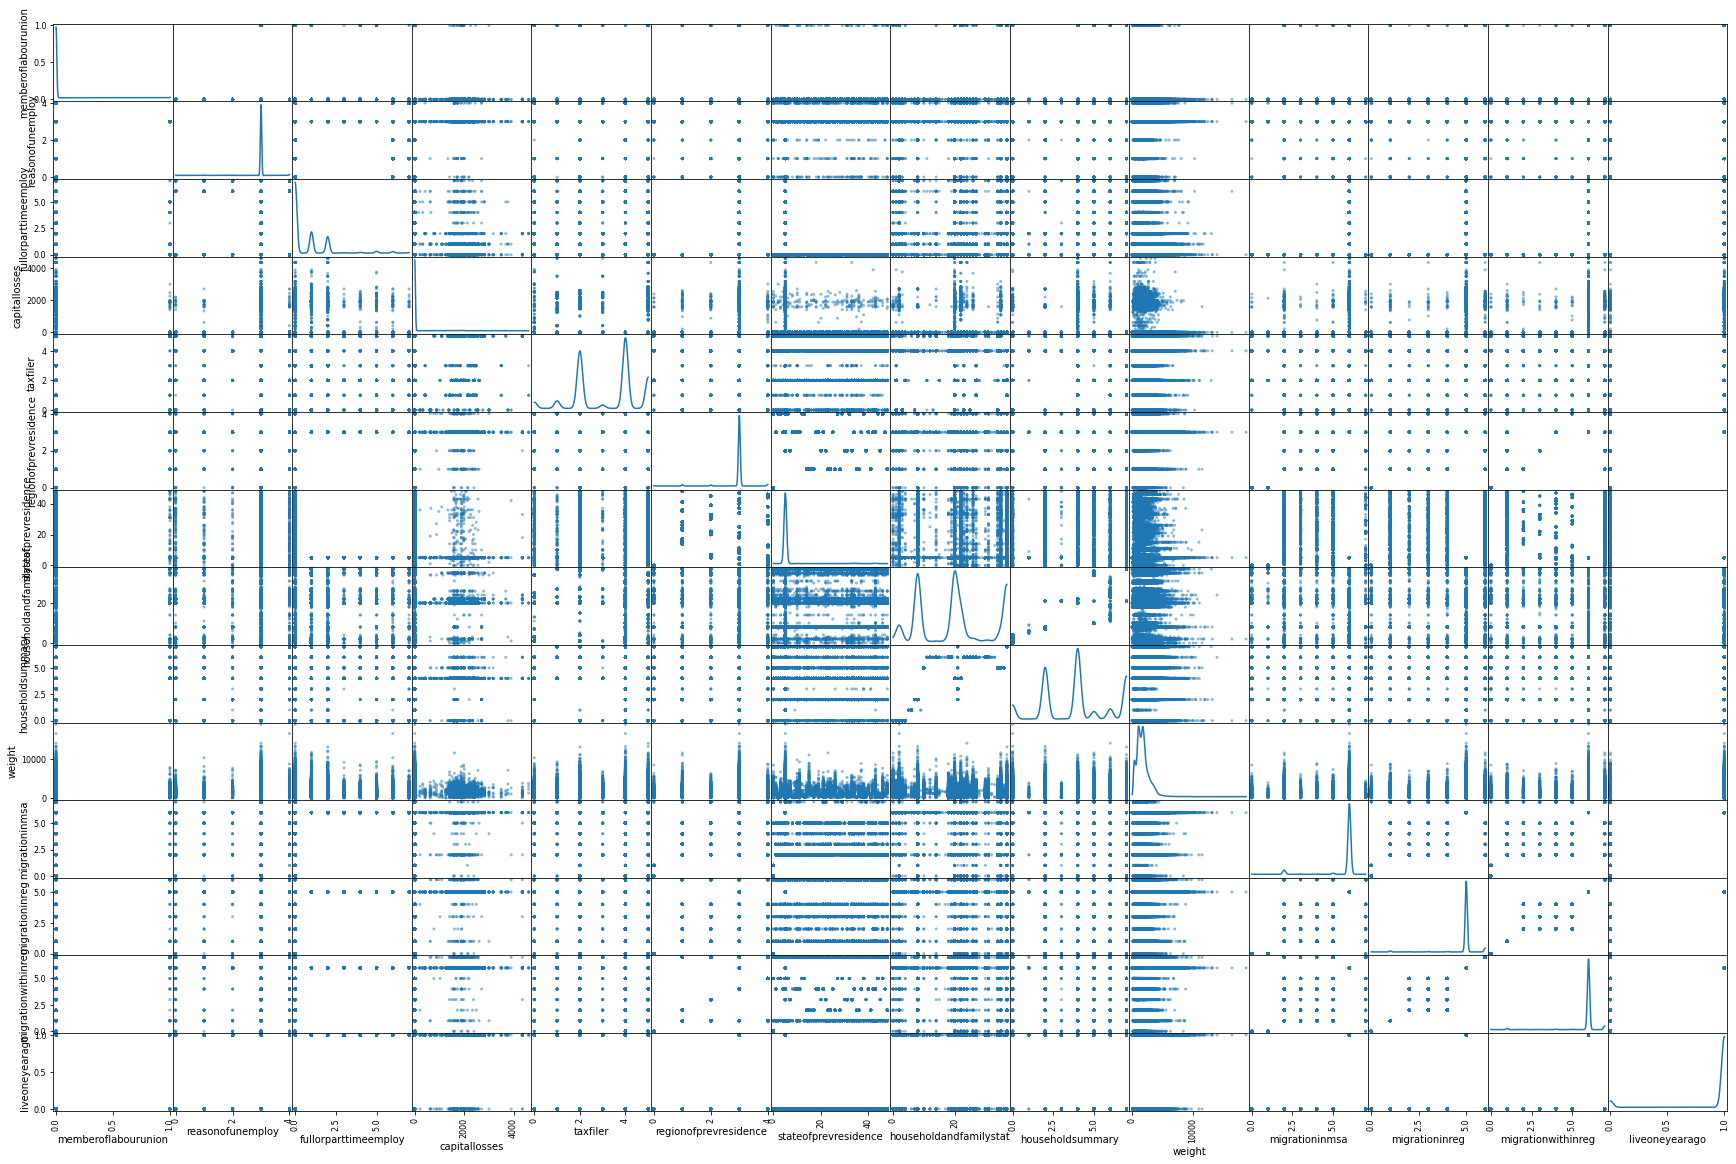

In [ ]:
pd.plotting.scatter_matrix(df.loc[:, "memberoflabourunion":"liveoneyearago"], diagonal="kde",figsize=(30,20))
plt.show()



1.  stateofprevresidence and householdfamilystat are positively correlated.
2.  stateofprevresidence and householdfamilystat are positively correlated with weight.

Multi Colinearity Variables:
1.  reasonofunemploy and regionofprevresidence
2.  householdfamilystat and householdsummary are highly linearly correlated with migrationinmsa, migrationinreg, migrationwithinreg and reasonofunemploy.
3. migrationinmsa, migrationinreg, migrationwithinreg are highly linearly correlated with householdsummary, regionofprevresidence and taxfiller





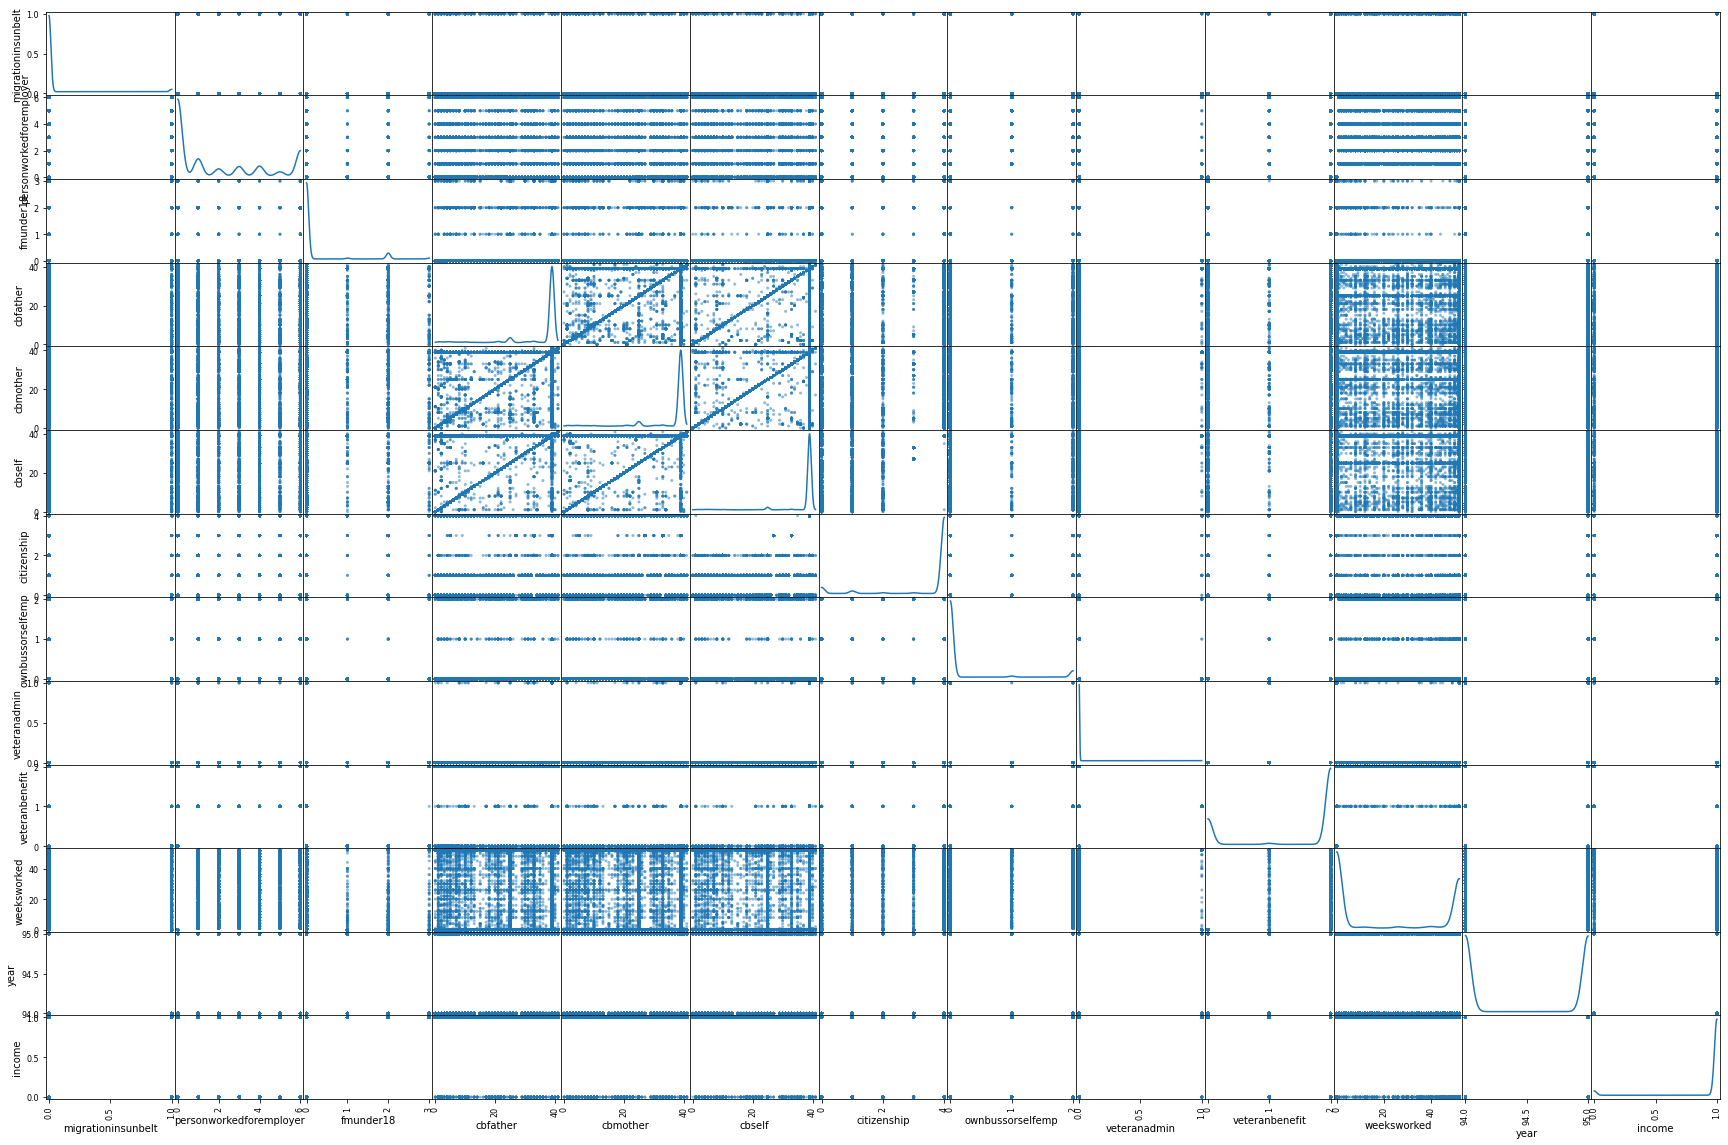

In [ ]:
pd.plotting.scatter_matrix(df.loc[:, "migrationinsunbelt":"income"], diagonal="kde",figsize=(30,20))
plt.show()


1.  cbfather, cbmother, cbself are positively correlated with weeksworked.

Multi Collinearity Variables:

1.  cbself is highly linearly correlated with cbfather and cbmother.






*  **Correlation**



Correlation is calculated using pearson correlation method

In [ ]:
df.corr(method = 'pearson')

age  classworker  ...      year    income
age                      1.000000     0.033446  ...  0.005104 -0.122101
classworker              0.033446     1.000000  ... -0.001106 -0.015312
industrycode             0.152116    -0.002299  ...  0.002865 -0.197656
occupationcode           0.114112     0.080924  ... -0.002986 -0.021480
education                0.012382     0.018285  ...  0.001804 -0.093171
enrollineduclstweek      0.101393    -0.013398  ...  0.003125 -0.037562
maritalstat             -0.293329    -0.038108  ... -0.001545  0.149986
majorindcode            -0.122189    -0.100073  ... -0.003871  0.148932
majorocccode             0.123401     0.064766  ...  0.001031 -0.191446
race                     0.090530     0.036390  ... -0.021621 -0.041226
origin                  -0.108601    -0.024571  ... -0.004327  0.056927
sex                     -0.066962     0.046386  ... -0.001337 -0.141970
memberoflabourunion      0.028616    -0.066486  ... -0.004002 -0.036550
reasonofunemploy        -0.002801     0.020002  ... -0.001856 -0.003052
fullorparttimeemploy     0.228037     0.001734  ...  0.574468 -0.016732
capitallosses            0.067630     0.014977  ...  0.001277 -0.172848
taxfiler                -0.313203    -0.026497  ... -0.001195  0.137139
regionofprevresidence    0.030991    -0.000959  ...  0.102594 -0.010626
stateofprevresidence    -0.068014    -0.000660  ... -0.215770  0.020417
householdandfamilystat   0.538096     0.019864  ...  0.005356 -0.086890
householdsummary         0.485980     0.016435  ...  0.005697 -0.079891
weight                  -0.003236    -0.005917  ...  0.012857 -0.015307
migrationinmsa           0.084249     0.006209  ...  0.268354 -0.019404
migrationinreg           0.014925    -0.000519  ...  0.072014 -0.000471
migrationwithinreg       0.020896    -0.000853  ...  0.090197 -0.002298
liveoneyearago           0.092965     0.003329  ...  0.295425 -0.025217
migrationinsunbelt      -0.057123    -0.002257  ... -0.175159  0.018347
personworkedforemployer  0.132762    -0.114813  ...  0.017942 -0.225108
fmunder18               -0.347675    -0.021654  ...  0.002758  0.072208
cbfather                -0.038608     0.000977  ... -0.007148 -0.018627
cbmother                -0.033185     0.002173  ... -0.007799 -0.015859
cbself                  -0.060881    -0.005306  ... -0.005683 -0.010326
citizenship             -0.051982    -0.007143  ... -0.012381 -0.014368
ownbussorselfemp         0.000335     0.013888  ...  0.007958 -0.041353
veteranadmin             0.056583    -0.002835  ...  0.000125  0.003743
veteranbenefit           0.679630     0.038505  ...  0.003900 -0.134011
weeksworked              0.195875     0.061224  ...  0.005004 -0.259127
year                     0.005104    -0.001106  ...  1.000000 -0.013004
income                  -0.122101    -0.015312  ... -0.013004  1.000000

[39 rows x 39 columns]

Correlation heatmap using pearson correlation method

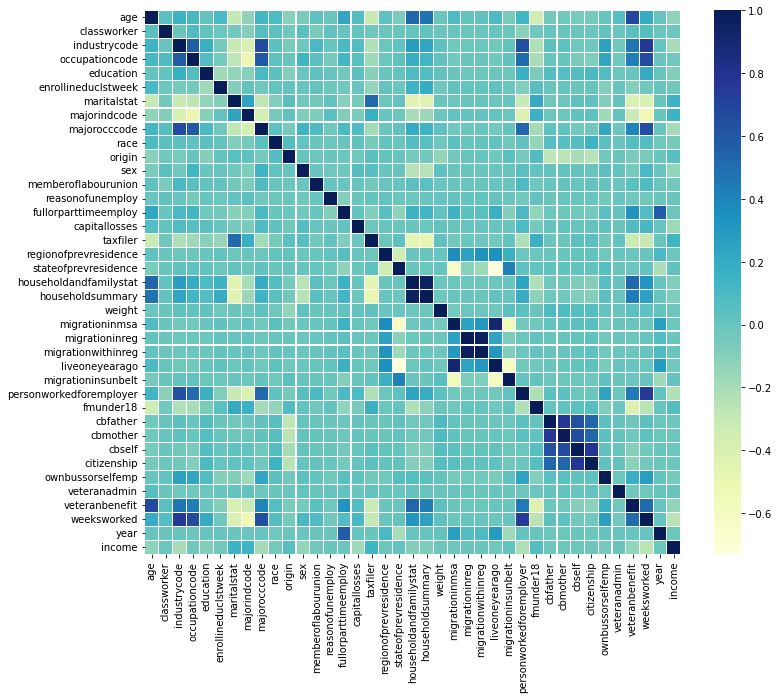

In [ ]:
corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

Correlation heatmap with respect to the target varaiable i.e. income

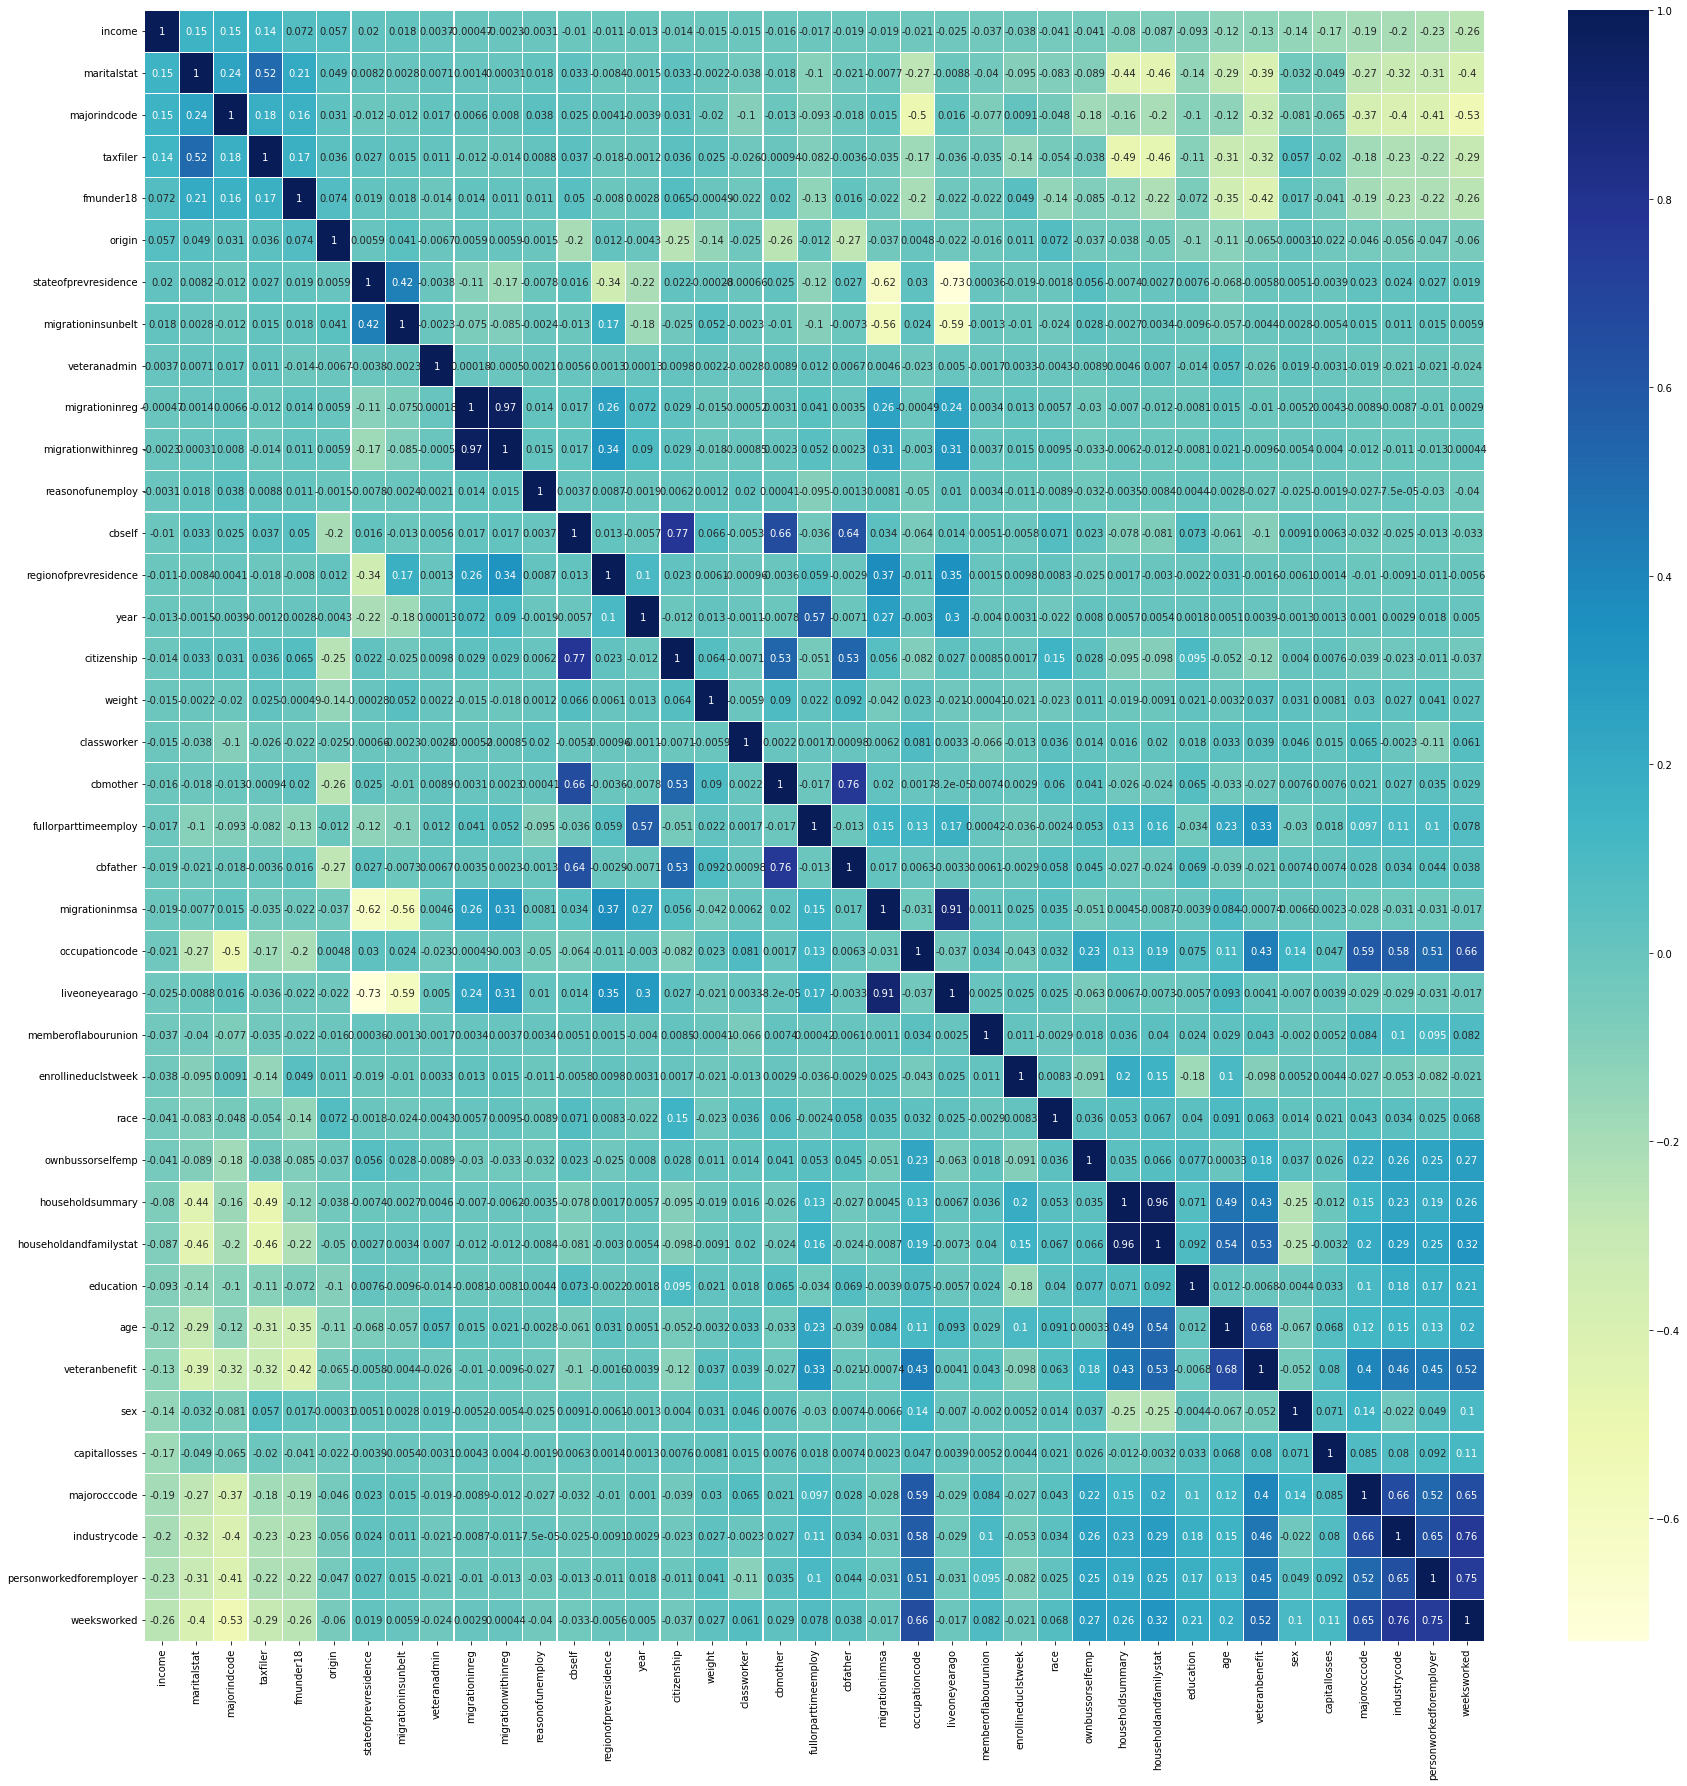

In [ ]:
#income correlation matrix
k = 39 #number of variables for heatmap
cols = corrmat.nlargest(k, 'income')['income'].index
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values, xticklabels=cols.values, annot=True)

To get correlation of specific variable with respect to the target variable

In [ ]:
import pandas as pd
from scipy.stats import pearsonr

In [ ]:
list1 = df['age']
list2 = df['income']

# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

Categorical Variables data frame was constructed to analyse correlation between categorical variables

In [ ]:
categorical_variables = df[['classworker', 'education', 'enrollineduclstweek', 'maritalstat', 'majorindcode', 'majorocccode', 'race', 'origin', 'sex', 'memberoflabourunion', 'reasonofunemploy', 'fullorparttimeemploy', 'taxfiler', 'regionofprevresidence', 'stateofprevresidence', 'householdandfamilystat', 'householdsummary', 'migrationinmsa', 'migrationinreg', 'migrationwithinreg', 'liveoneyearago', 'migrationinsunbelt', 'personworkedforemployer', 'fmunder18', 'cbfather', 'cbmother', 'cbself', 'citizenship', 'veteranadmin', 'year', 'income']]

In [ ]:
categorical_variables.head()

classworker  education  enrollineduclstweek  ...  veteranadmin  year  income
0            5         16                    1  ...             0    94       1
1            3          0                    1  ...             0    95       1
2            3         10                    1  ...             0    94       1
3            3         10                    1  ...             0    94       1
6            3         12                    1  ...             0    95       1

[5 rows x 31 columns]

In [ ]:
categorical_variables.shape

(177973, 31)

**Chi2 method was used to identify the correlation between the categorical values**

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
resultant = pd.DataFrame(data=[(0 for i in range(len(categorical_variables.columns))) for i in range(len(categorical_variables.columns))],
                         columns=list(categorical_variables.columns))
resultant.set_index(pd.Index(list(categorical_variables.columns)), inplace = True)

In [ ]:
for i in list(categorical_variables.columns):
    for j in list(categorical_variables.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(categorical_variables[i]).reshape(-1, 1), (np.array(categorical_variables[j]).reshape(-1, 1).astype('int')))
            resultant.loc[i,j] = p_val
print(resultant)

                           classworker  ...         income
classworker               0.000000e+00  ...   2.765944e-03
education                 0.000000e+00  ...   0.000000e+00
enrollineduclstweek       7.389247e-02  ...   8.218499e-03
maritalstat               0.000000e+00  ...   0.000000e+00
majorindcode              0.000000e+00  ...   0.000000e+00
majorocccode              0.000000e+00  ...   0.000000e+00
race                      8.450028e-30  ...   1.786301e-15
origin                    0.000000e+00  ...   0.000000e+00
sex                      1.965072e-152  ...   0.000000e+00
memberoflabourunion       0.000000e+00  ...   2.320170e-53
reasonofunemploy          4.580247e-28  ...   8.503631e-01
fullorparttimeemploy      0.000000e+00  ...   1.262486e-24
taxfiler                  0.000000e+00  ...   0.000000e+00
regionofprevresidence     9.393668e-01  ...   3.472359e-01
stateofprevresidence      9.640817e-67  ...   2.986029e-99
householdandfamilystat    0.000000e+00  ...   0.000000e+

p - values from the chi2 method were identiied. If 2 variables have p-value less than 0.05 then they have high correlation. If p-value is gretaer than 0.05, then there is no correlation

**Chi squared correlation heatmap**

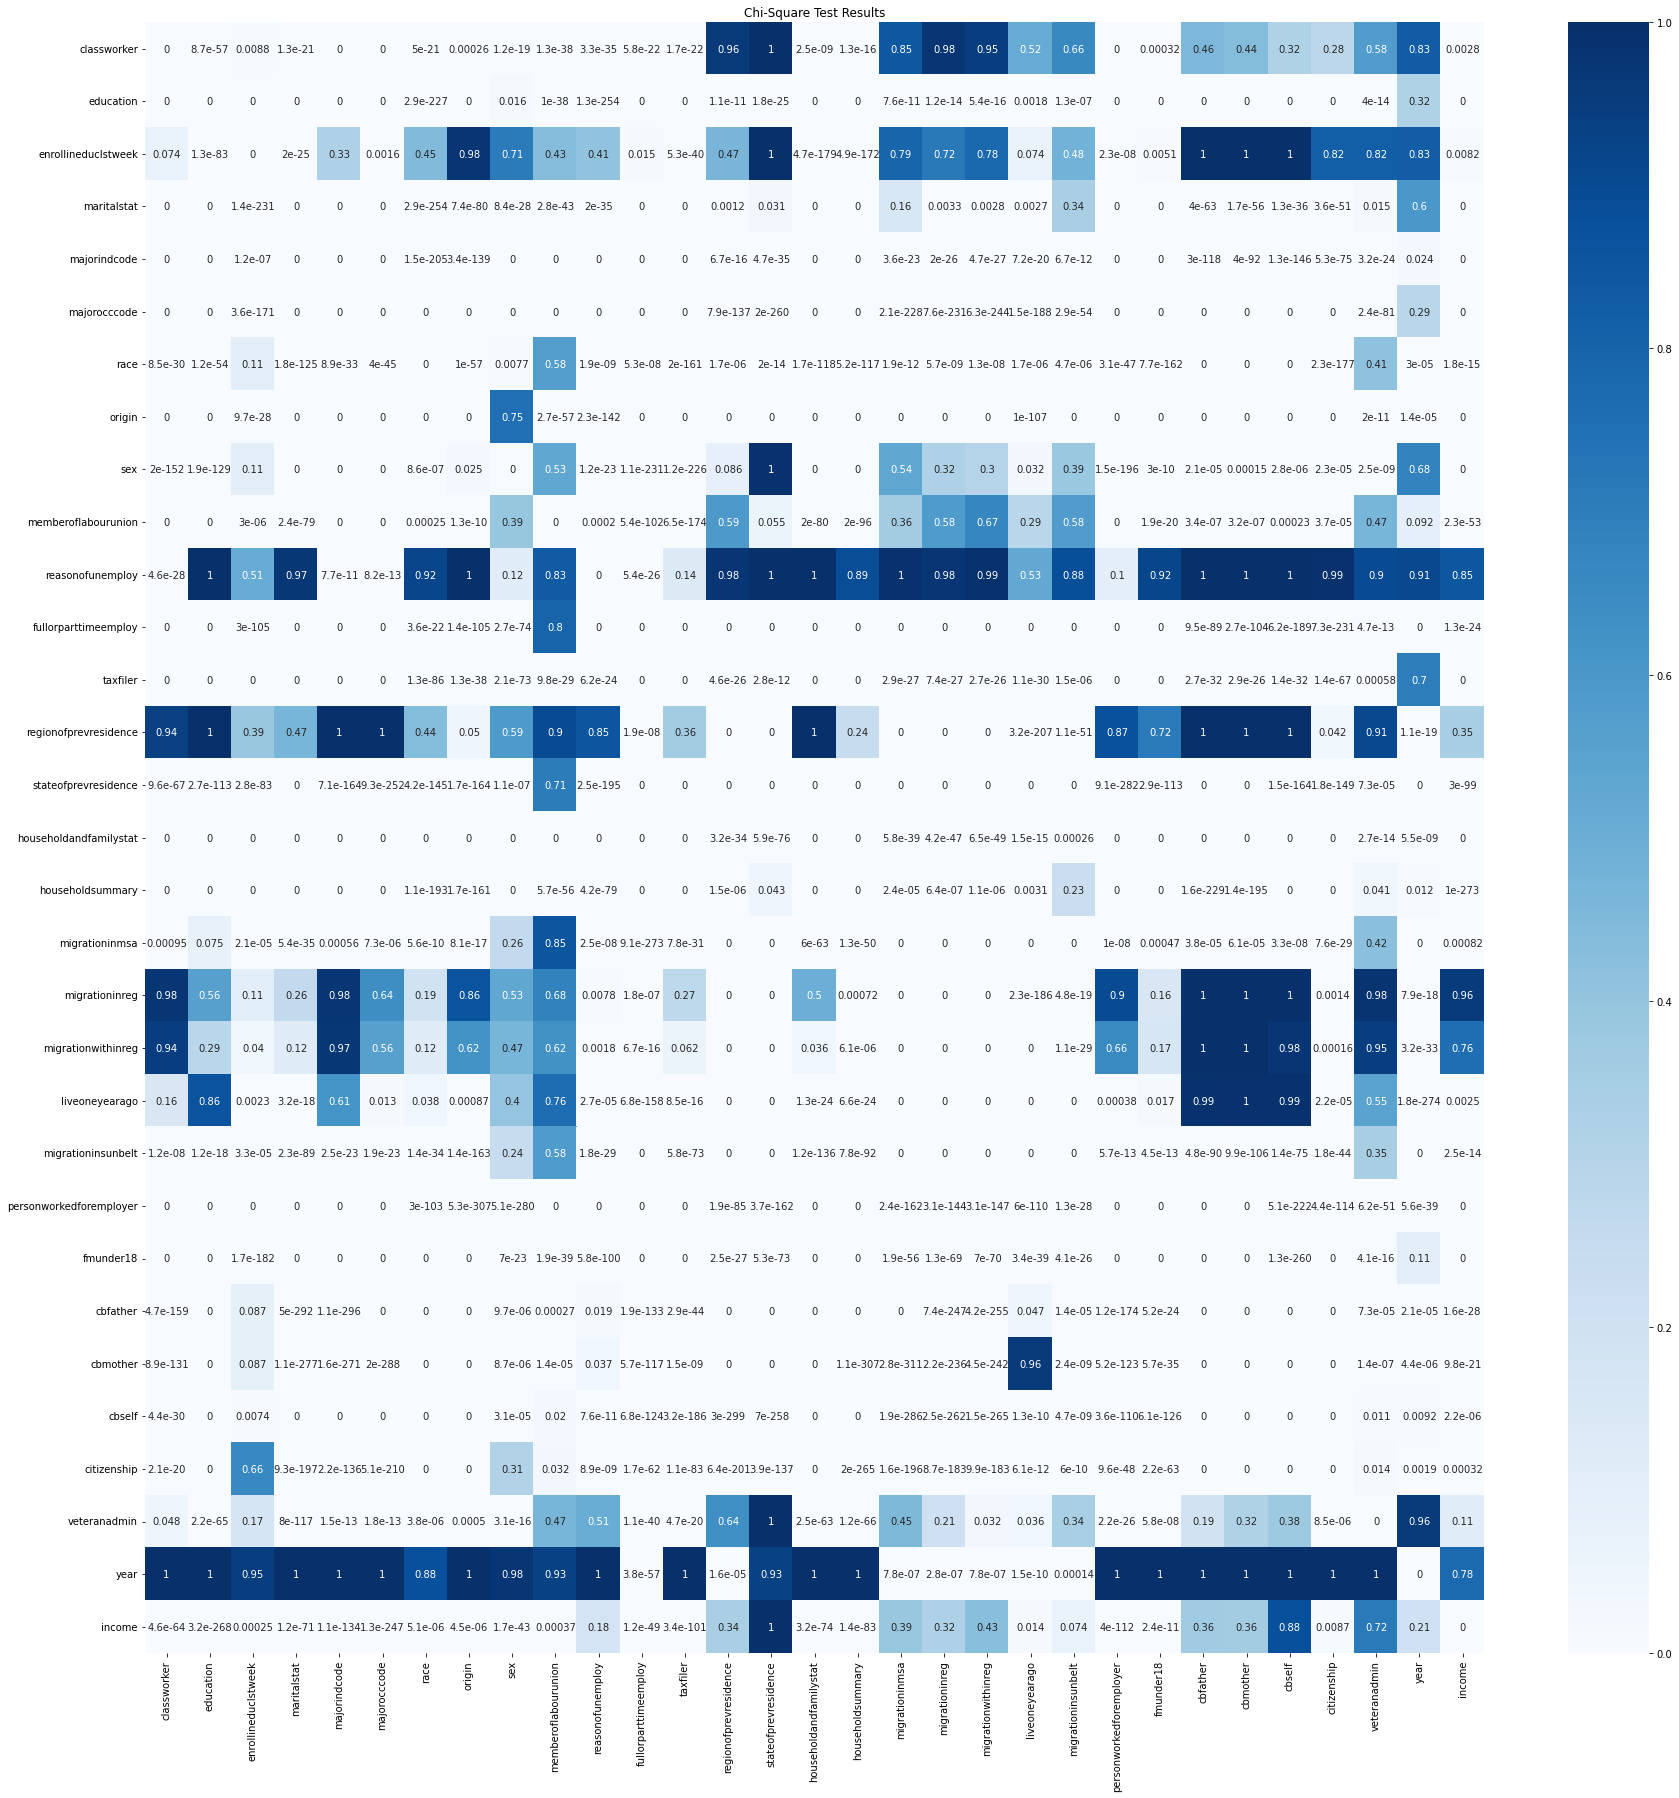

In [ ]:
#To plot the visualization of chi sqaured correlation heatmap
fig = plt.figure(figsize=(30,30))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()


1.  classworker, enrollineduclstweek, race, memberoflabourunion, fullorparttimeemploy, state of prevresidence, householdsummary, migrationinmsa, liveoneyearago, migrationinsunbelt, cbfather, cbmother, citizenship are highly correlated with income because p-value is less than 0.05.
2.  education and maritalstat are highly correlated with race as p-value is less than 0.05.
3.  taxfiler and sex are highly correlated as p-value is less than 0.05.
4.  fmunder18 and veteranadmin are highly correlated as p-value is less than 0.05.



# **MultiColinearity**

Multicollinearity was identified among the variables using VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

variables          VIF
0                       age     8.496943
1               classworker    16.617312
2              industrycode     4.856788
3            occupationcode     3.326028
4                 education     8.100619
5       enrollineduclstweek    43.667529
6               maritalstat     9.280815
7              majorindcode    13.362384
8              majorocccode     3.169226
9                      race    19.933366
10                   origin     1.344446
11                      sex     2.266245
12      memberoflabourunion     1.028081
13         reasonofunemploy   143.223986
14     fullorparttimeemploy     1.598269
15            capitallosses     1.047062
16                 taxfiler    10.706710
17    regionofprevresidence   122.963730
18     stateofprevresidence     4.730442
19   householdandfamilystat    77.346578
20         householdsummary    82.300516
21                   weight     4.205196
22           migrationinmsa   219.447294
23           migrationinreg  1329.557645
24       migrationwithinreg  1366.672406
25           liveoneyearago   102.942095
26       migrationinsunbelt     2.185631
27  personworkedforemployer     4.153855
28                fmunder18     1.504794
29                 cbfather    49.931620
30                 cbmother    52.698415
31                   cbself   106.840036
32              citizenship    29.894680
33         ownbussorselfemp     1.225810
34             veteranadmin     1.017363
35           veteranbenefit    14.942856
36              weeksworked     8.108519
37                     year   487.723865

VIF between 5 and 10 indicated high correlation among the variables causing a problem of multicollinearity. If VIF goes above 10, then the regression coefficients are poorly estimated due to multicollinearity.

# **Feature Selection**

**Feature selection for model training:**
'enrollineduclstweek', 'race', 'sex', 'memberoflabourunion', 'fullorparttimeemploy', 'taxfiler', 'stateofprevresidence', 'migrationinmsa', 'migrationinsunbelt', 'fmunder18', 'cbfather', 'cbmother', 'veteranadmin', 'classworker', 'education', 'maritalstat', 'age', 'origin'

18 variables were selected out of 40 for model training

# **Random Forest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [ ]:
#Set of independent variables
X = df[['enrollineduclstweek', 'race', 'sex', 'memberoflabourunion', 'fullorparttimeemploy', 'taxfiler', 'stateofprevresidence', 'migrationinmsa', 'migrationinsunbelt', 'fmunder18', 'cbfather', 'cbmother', 'veteranadmin', 'classworker', 'education', 'maritalstat', 'age', 'origin']]

In [ ]:
#Dependent variable
y = df["income"]

In [ ]:
#Training and Testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(142378, 18) (35595, 18) (142378,) (35595,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Creating a random forest classifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [ ]:
#fiting the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
#Predicting X_test
rfprediction = rf.predict(X_test)

In [ ]:
#to check the root mean squared error
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfprediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfprediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rfprediction)))

Mean Absolute Error: 0.054249192302289646
Mean Squared Error: 0.054249192302289646
Root Mean Squared Error: 0.23291456009079733


In [ ]:
# Calculate the absolute errors
errors_rf = abs(rfprediction - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_rf), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_rf / y_test.loc[(y_test!=0)])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.61 %.


In [ ]:
print(rf.score(X_train, y_train))

0.9748065010043686


In [ ]:
print(rf.score(X_test, y_test))

0.9457508076977104


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
matrix = confusion_matrix(y_test, rfprediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

0.23 value shows the people that have income level above 50,000 and are correctly identified by algorithm.
0.99 value shows the people that have income level below 50,000 and are correctly identified by algorithm.
0.014 values are those when person has income level above 50,000 but algorithm said they don't (False Negative)
0.77 values are that when peron has income level below 50,000 but algorithm says they have above 50,000 income level (False Positive)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, rfprediction))

              precision    recall  f1-score   support

           0       0.49      0.23      0.31      1906
           1       0.96      0.99      0.97     33689

    accuracy                           0.95     35595
   macro avg       0.72      0.61      0.64     35595
weighted avg       0.93      0.95      0.94     35595



**For income below 50,000:**
Precision score is 0.96 which is close to 1 indicates that model has no false positives.
Recall score is 0.99 which is close to 1 indicates that model has no false negatives.
F1 score is 0.97 which is close to 1
Accuracy of model is 95%
macro avg value is less because there is class imbalance
weighted avg values are high because it favours the majority class (below 50,000 income)

In [ ]:
pd.DataFrame(classification_report(y_test, rfprediction, output_dict=True))

0             1  accuracy     macro avg  weighted avg
precision     0.486279      0.957819  0.945751      0.722049      0.932570
recall        0.232424      0.986108  0.945751      0.609266      0.945751
f1-score      0.314519      0.971758  0.945751      0.643138      0.936565
support    1906.000000  33689.000000  0.945751  35595.000000  35595.000000

In [ ]:
from sklearn.metrics import jaccard_score

In [ ]:
jaccard_score(y_test, rfprediction)

0.9450671370050068

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=27)

In [ ]:
X_train_smote_rf, y_train_smote_rf = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_smote_rf.value_counts()

1    134794
0    134794
Name: income, dtype: int64

In [ ]:
rf_smote = RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [ ]:
rf_smote.fit(X_train_smote_rf, y_train_smote_rf)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
rfpredictionsmote = rf_smote.predict(X_train_smote_rf)

In [ ]:
print(classification_report(y_train_smote_rf, rfpredictionsmote))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    134794
           1       0.98      0.92      0.95    134794

    accuracy                           0.95    269588
   macro avg       0.95      0.95      0.95    269588
weighted avg       0.95      0.95      0.95    269588



In [ ]:
jaccard_score(y_train_smote_rf, rfpredictionsmote)

0.8978140293637846

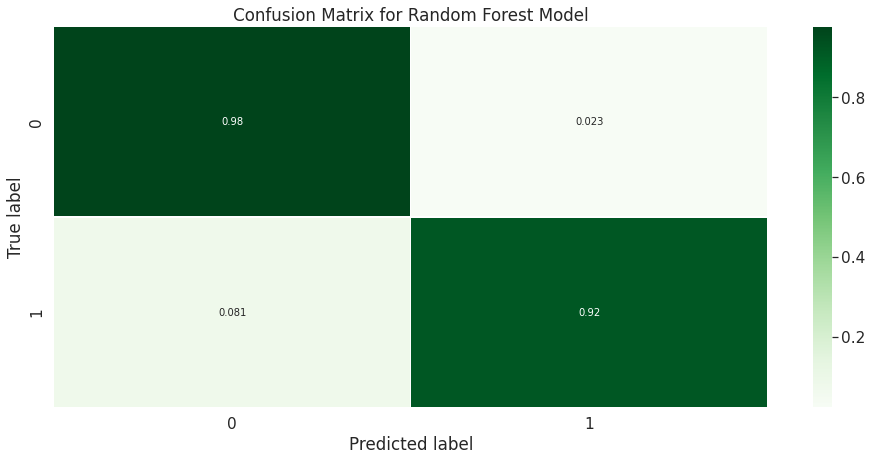

In [ ]:
matrix = confusion_matrix(y_train_smote_rf, rfpredictionsmote)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating a logistic regression
logreg = LogisticRegression()

In [ ]:
#Fitting the model
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Predicting X_test
lrprediction = logreg.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [ ]:
# Calculate the absolute errors
errors_lr = abs(lrprediction - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_lr), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_lr / y_test.loc[(y_test!=0)])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.97 %.


In [ ]:
from sklearn.metrics import confusion_matrix

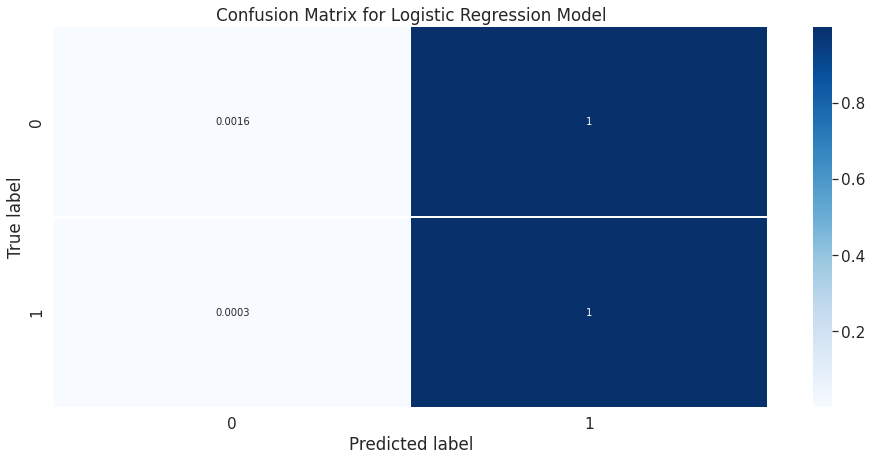

In [ ]:
matrix = confusion_matrix(y_test, lrprediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

0.0016 value shows the people that have income level above 50,000 and are correctly identified by algorithm. 1 value shows the people that have income level below 50,000 and are correctly identified by algorithm. 0.0003 values are those when person has income level above 50,000 but algorithm said they don't (False Negative) 1 values are that when peron has income level below 50,000 but algorithm says they have above 50,000 income level (False Positive)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, lrprediction))

              precision    recall  f1-score   support

           0       0.23      0.00      0.00      1906
           1       0.95      1.00      0.97     33689

    accuracy                           0.95     35595
   macro avg       0.59      0.50      0.49     35595
weighted avg       0.91      0.95      0.92     35595



**For income below 50,000:**
Precision score is 0.95 which is close to 1 indicates that model has no false positives.
Recall score is 1  indicates that model has no false negatives.
F1 score is 0.97 which is close to 1
Accuracy of model is 95%
macro avg value is less because there is class imbalance
weighted avg values are high because it favours the majority class (below 50,000 income)

In [ ]:
pd.DataFrame(classification_report(y_test, lrprediction, output_dict=True))

0             1  accuracy     macro avg  weighted avg
precision     0.230769      0.946518  0.946256      0.588644      0.908192
recall        0.001574      0.999703  0.946256      0.500639      0.946256
f1-score      0.003127      0.972384  0.946256      0.487755      0.920483
support    1906.000000  33689.000000  0.946256  35595.000000  35595.000000

In [ ]:
from sklearn.metrics import jaccard_score

In [ ]:
jaccard_score(y_test, lrprediction)

0.9462519667340975

In [ ]:
X_train_smote_lr, y_train_smote_lr = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_smote_lr.value_counts()

1    134794
0    134794
Name: income, dtype: int64

In [ ]:
logreg_smote = LogisticRegression()

In [ ]:
logreg_smote.fit(X_train_smote_lr, y_train_smote_lr)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
logregpredictionsmote = logreg_smote.predict(X_train_smote_lr)

In [ ]:
print(classification_report(y_train_smote_lr, logregpredictionsmote))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75    134794
           1       0.77      0.68      0.72    134794

    accuracy                           0.74    269588
   macro avg       0.74      0.74      0.74    269588
weighted avg       0.74      0.74      0.74    269588



In [ ]:
jaccard_score(y_train_smote_lr, logregpredictionsmote)

0.5644101650124451

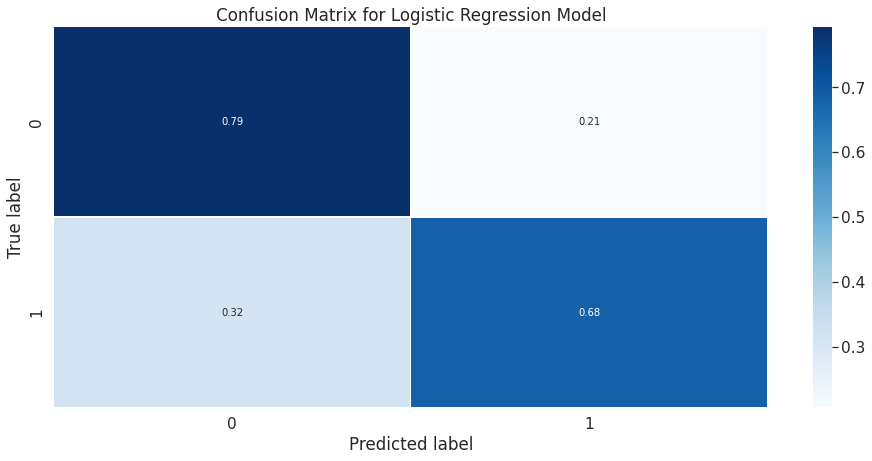

In [ ]:
matrix = confusion_matrix(y_train_smote_lr, logregpredictionsmote)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

# **K Nearest Neighbor (KNN) Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Creating KNeighbors Classifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
#Fitting the model
knnclassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#Predicting X_test
knnprediction = knnclassifier.predict(X_test)

In [ ]:
# Calculate mean absolute percentage error (MAPE)
errors_knn = abs(knnprediction - y_test)
print('Mean Absolute Error:', round(np.mean(errors_knn), 2))

Mean Absolute Error: 0.05


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_knn / y_test.loc[(y_test!=0)])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.99 %.


In [ ]:
print(rf.score(X_train, y_train))

In [ ]:
print(knnclassifier.score(X_test, y_test))

0.9632926907941423


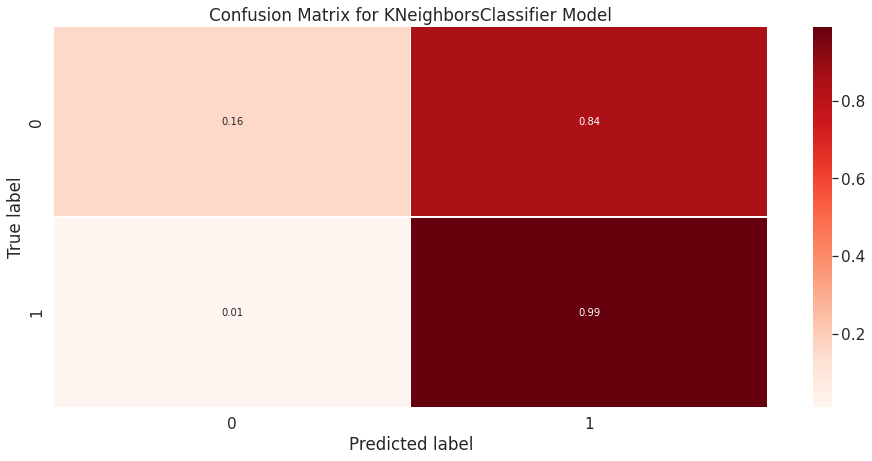

In [ ]:
matrix = confusion_matrix(y_test, knnprediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNeighborsClassifier Model')
plt.show()

0.16 value shows the people that have income level above 50,000 and are correctly identified by algorithm. 0.99 value shows the people that have income level below 50,000 and are correctly identified by algorithm. 0.01 values are those when person has income level above 50,000 but algorithm said they don't (False Negative) 0.84 values are that when peron has income level below 50,000 but algorithm says they have above 50,000 income level (False Positive)

In [ ]:
print(classification_report(y_test, knnprediction))

              precision    recall  f1-score   support

           0       0.47      0.16      0.24      1906
           1       0.95      0.99      0.97     33689

    accuracy                           0.95     35595
   macro avg       0.71      0.57      0.60     35595
weighted avg       0.93      0.95      0.93     35595



**For income below 50,000:**
Precision score is 0.95 which is close to 1 indicates that model has no false positives.
Recall score is 0.99 which is close to 1 indicates that model has no false negatives.
F1 score is 0.97 which is close to 1
Accuracy of model is 95%
macro avg value is less because there is class imbalance
weighted avg values are high because it favours the majority class (below 50,000 income)

In [ ]:
pd.DataFrame(classification_report(y_test, knnprediction, output_dict=True))

0             1  accuracy     macro avg  weighted avg
precision     0.470405      0.954110  0.945386      0.712257      0.928209
recall        0.158447      0.989908  0.945386      0.574177      0.945386
f1-score      0.237049      0.971679  0.945386      0.604364      0.932342
support    1906.000000  33689.000000  0.945386  35595.000000  35595.000000

In [ ]:
jaccard_score(y_test, knnprediction)

0.9449182557447653

In [ ]:
X_train_smote_knn, y_train_smote_knn = sm.fit_resample(X_train, y_train)

In [ ]:
knn_smote = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [ ]:
knn_smote.fit(X_train_smote_knn, y_train_smote_knn)

KNeighborsClassifier()

In [ ]:
knnpredictionsmote = knn_smote.predict(X_train_smote_knn)

In [ ]:
print(classification_report(y_train_smote_knn, knnpredictionsmote))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92    134794
           1       0.96      0.87      0.91    134794

    accuracy                           0.92    269588
   macro avg       0.92      0.92      0.92    269588
weighted avg       0.92      0.92      0.92    269588



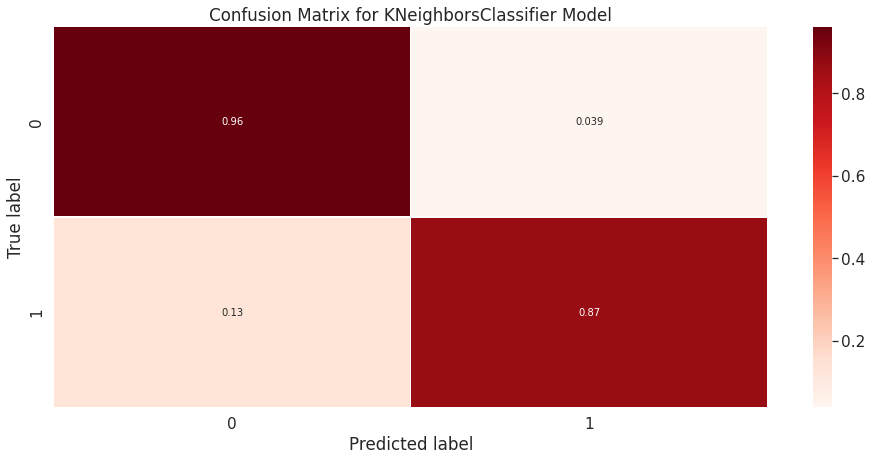

In [ ]:
matrix = confusion_matrix(y_train_smote_knn, knnpredictionsmote)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Reds, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for KNeighborsClassifier Model')
plt.show()

# **XGBoost**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
#Creating xgb classifier
xgb_clf = XGBClassifier()

#Fitting the model
xgb_clf.fit(X_train, y_train)

XGBClassifier()

In [ ]:
#Predicting X_test
xgbprediction = xgb_clf.predict(X_test)

In [ ]:
# Calculate the absolute errors
errors_xgb = abs(xgbprediction - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors_xgb), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors_xgb / y_test.loc[(y_test!=0)])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.75 %.


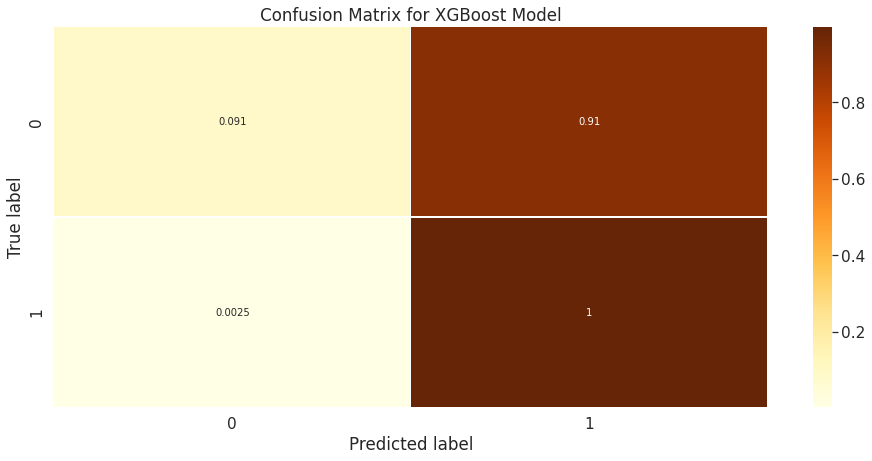

In [ ]:
matrix = confusion_matrix(y_test, xgbprediction)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.YlOrBr, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

0.091 value shows the people that have income level above 50,000 and are correctly identified by algorithm. 1 value shows the people that have income level below 50,000 and are correctly identified by algorithm. 0.0025 values are those when person has income level above 50,000 but algorithm said they don't (False Negative) 0.91 values are that when peron has income level below 50,000 but algorithm says they have above 50,000 income level (False Positive)

In [ ]:
print(classification_report(y_test, xgbprediction))

              precision    recall  f1-score   support

           0       0.67      0.09      0.16      1906
           1       0.95      1.00      0.97     33689

    accuracy                           0.95     35595
   macro avg       0.81      0.54      0.57     35595
weighted avg       0.94      0.95      0.93     35595



**For income below 50,000:**
Precision score is 0.95 which is close to 1 indicates that model has no false positives.
Recall score is 1 indicates that model has no false negatives.
F1 score is 0.97 which is close to 1
Accuracy of model is 95%
macro avg value is less because there is class imbalance
weighted avg values are high because it favours the majority class (below 50,000 income)

In [ ]:
pd.DataFrame(classification_report(y_test, xgbprediction, output_dict=True))

0             1  accuracy     macro avg  weighted avg
precision     0.673152      0.950959  0.948954      0.812056      0.936084
recall        0.090766      0.997507  0.948954      0.544136      0.948954
f1-score      0.159963      0.973677  0.948954      0.566820      0.930105
support    1906.000000  33689.000000  0.948954  35595.000000  35595.000000

In [ ]:
jaccard_score(y_test, xgbprediction)

0.9487041951329682

In [ ]:
X_train_smote_xgb, y_train_smote_xgb = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_smote_xgb.value_counts()

1    134794
0    134794
Name: income, dtype: int64

In [ ]:
xgb_smote = XGBClassifier()

In [ ]:
xgb_smote.fit(X_train_smote_xgb, y_train_smote_xgb)

XGBClassifier()

In [ ]:
xgbpredictionsmote = xgb_smote.predict(X_train_smote_xgb)

In [ ]:
print(classification_report(y_train_smote_xgb, xgbpredictionsmote))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86    134794
           1       0.89      0.80      0.84    134794

    accuracy                           0.85    269588
   macro avg       0.86      0.85      0.85    269588
weighted avg       0.86      0.85      0.85    269588



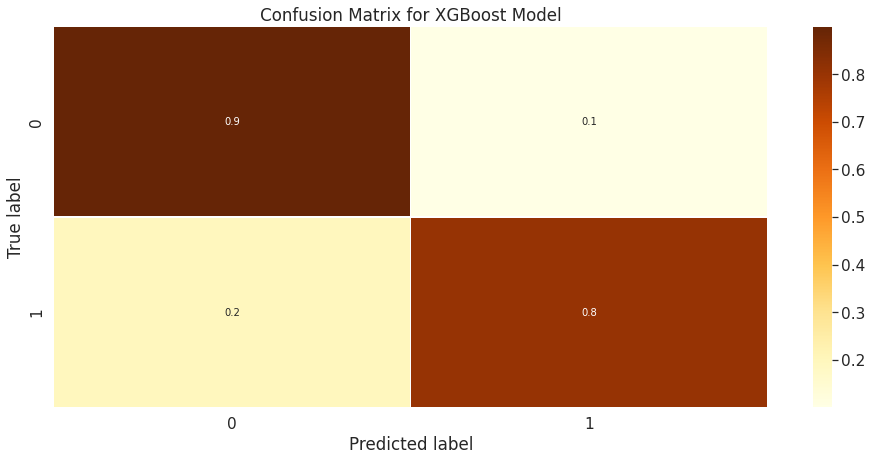

In [ ]:
matrix = confusion_matrix(y_train_smote_xgb, xgbpredictionsmote)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.YlOrBr, linewidths=0.2)

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# **ROC Curve**

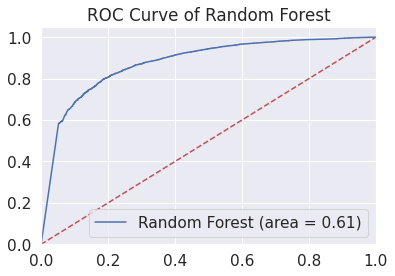

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of Random Forest")
plt.show()

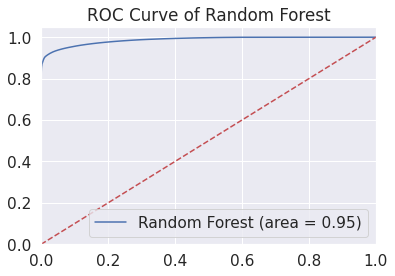

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_smote_rf, rf_smote.predict(X_train_smote_rf))
fpr, tpr, thresholds = roc_curve(y_train_smote_rf, rf_smote.predict_proba(X_train_smote_rf)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of Random Forest")
plt.show()

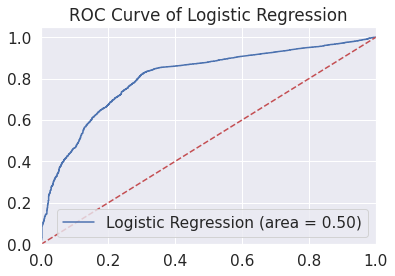

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of Logistic Regression")
plt.show()

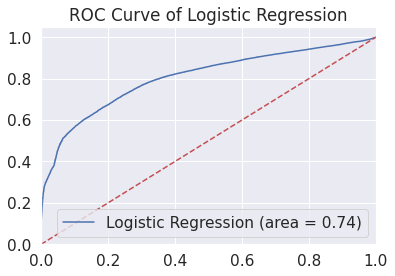

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_smote_lr, logreg_smote.predict(X_train_smote_lr))
fpr, tpr, thresholds = roc_curve(y_train_smote_lr, logreg_smote.predict_proba(X_train_smote_lr)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of Logistic Regression")
plt.show()

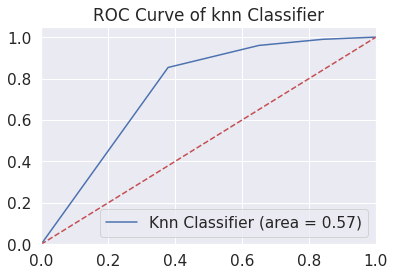

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, knnclassifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knnclassifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Knn Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of knn Classifier")
plt.show()

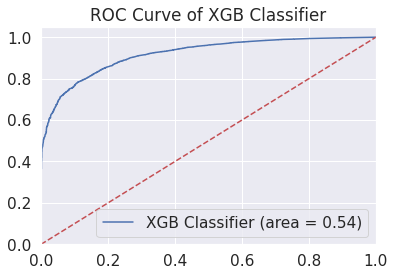

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, xgb_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, xgb_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of XGB Classifier")
plt.show()

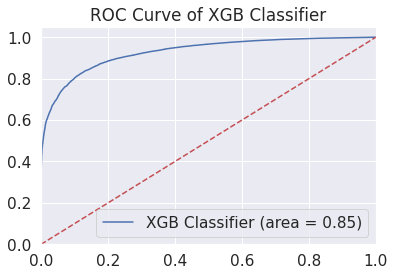

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_train_smote_xgb, xgb_smote.predict(X_train_smote_xgb))
fpr, tpr, thresholds = roc_curve(y_train_smote_xgb, xgb_smote.predict_proba(X_train_smote_xgb)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title("ROC Curve of XGB Classifier")
plt.show()